## **Datamites Project 1** <br>
## PRCP-1014 - Vaccination Prediction Description Project<br>


Project Team ID : **PTID-CDS-AUG-23-1608** <br>
Project Start Date : 23-08-2023<br>

**Project Overview**
* In this Project, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."
* As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
* A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

* Data is provided courtesy of the United States National Center for Health Statistics.
* U.S. Department of Health and Human Services (DHHS). National Center for Health Statistics. The National 2009 H1N1 Flu Survey. Hyattsville, MD: Centers for Disease Control and Prevention, 2012.
Images courtesy of the U.S. Navy and the Fort Meade Public Affairs Office via Flickr under the CC BY 2.0 license.


#### **Problem statement**
* By using relevant Machine learning model to predict whether the individuals got H1N1 and Seasonal flu vaccines or not.

#### **Problem Description**

The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines.
Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.
Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data=pd.read_csv('features.csv')
y=pd.read_csv('labels.csv')

In [3]:
#features
data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
#labels
y

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


**Domain Analysis**
###H1N1_concern:
Level of concern about the H1N1 flu.\
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
###H1N1_knowledge:
Level of knowledge about H1N1 flu.\
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
###Behavioral_antiviral_meds:
The individual has taken antiviral medications or not.\
0 = No; 1 = Yes
###Behavioral_avoidance:
The individual has avoided close contact with others with flu-like symptoms or not.\
0 = No; 1 = Yes
###Behavioral_face_mask:
The person has bought a face mask or not.\
0 = No; 1 = Yes
###Behavioral_wash_hands:
The person has frequently washed hands or used hand sanitizer.\
0 = No; 1 = Yes
###Behavioral_large_gatherings:
The person has reduced time at large gatherings or not.\
0 = No; 1 = Yes
###Behavioral_outside_home:
The individual has reduced contact with people outside of own household.\
0 = No; 1 = Yes
###Behavioral_touch_face:
The person has avoided touching eyes, nose, or mouth.\
0 = No; 1 = Yes
###Doctor_recc_h1n1:
Whether the H1N1 flu vaccine was recommended by doctor.\
0 = No; 1 = Yes
###Doctor_recc_seasonal:
Whether the Seasonal flu vaccine was recommended by doctor.\
0 = No; 1 = Yes
###Chronic_med_condition :
whether the person has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness.\
0 = No; 1 = Yes
###Child_under_6_months:
Whether the person has regular close contact with a child under the age of six months.\
0 = No; 1 = Yes.
###Health_worker:
Whether he/she is a healthcare worker.\
0 = No; 1 = Yes.
###Health_insurance:
Whether the person has health insurance or not.\
0 = No; 1 = Yes.
###Opinion_h1n1_vacc_effective:
Respondent's opinion about H1N1 vaccine effectiveness.\
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
###Opinion_h1n1_risk:
Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.\
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
###Opinion_h1n1_sick_from_vacc:
Respondent's worry of getting sick from taking H1N1 vaccine.\
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
###Opinion_seas_vacc_effective:
Respondent's opinion about seasonal flu vaccine effectiveness.\
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
###opinion_seas_risk:
Respondent's opinion about risk of getting sick with seasonal flu without vaccine.\
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
###opinion_seas_sick_from_vacc:
Respondent's worry of getting sick from taking seasonal flu vaccine.\
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
###Age_group:
Age group of respondent.
###Education:
Education level of respondent.
###Race:
Race of respondent.
###Sex:
Sex of respondent.
###Income_poverty:
Household annual income of respondent with respect to 2008 Census poverty thresholds.
###Marital_status:
Marital status of respondent.
###Rent_or_own:
Housing situation of respondent.
###Employment_status:
Employment status of respondent.
###hhs_geo_region:
Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
###Census_msa:
Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
###Household_adults:
Number of other adults in household, top-coded to 3.
###Household_children:
Number of children in household, top-coded to 3.
###Employment_industry:
Type of industry respondent is employed in. Values are represented as short random character strings.
###Employment_occupation:
Type of occupation of respondent. Values are represented as short random character strings.
###h1n1_vaccine:
Whether respondent received H1N1 flu vaccine or not.\
0 = No; 1 = Yes.
###seasonal_vaccine:
Whether respondent received seasonal flu vaccine or not.\
0 = No; 1 = Yes.




**Basic checks**

In [5]:
data.shape

(26707, 36)

* Dataset has 26707 rows and 36 columns

In [6]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
data.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [10]:
# fetching numerical column
num_col=data.select_dtypes(include=['float64'])
num_col.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [11]:
# fetching categorical column
cat_col=data.select_dtypes(include='O')
cat_col.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [12]:
# Statistical analysis for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [13]:
# Statistical analysis for categorical column
data.describe(include='O')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


**Exploratory Data Analysis**

**Univariate Analysis**

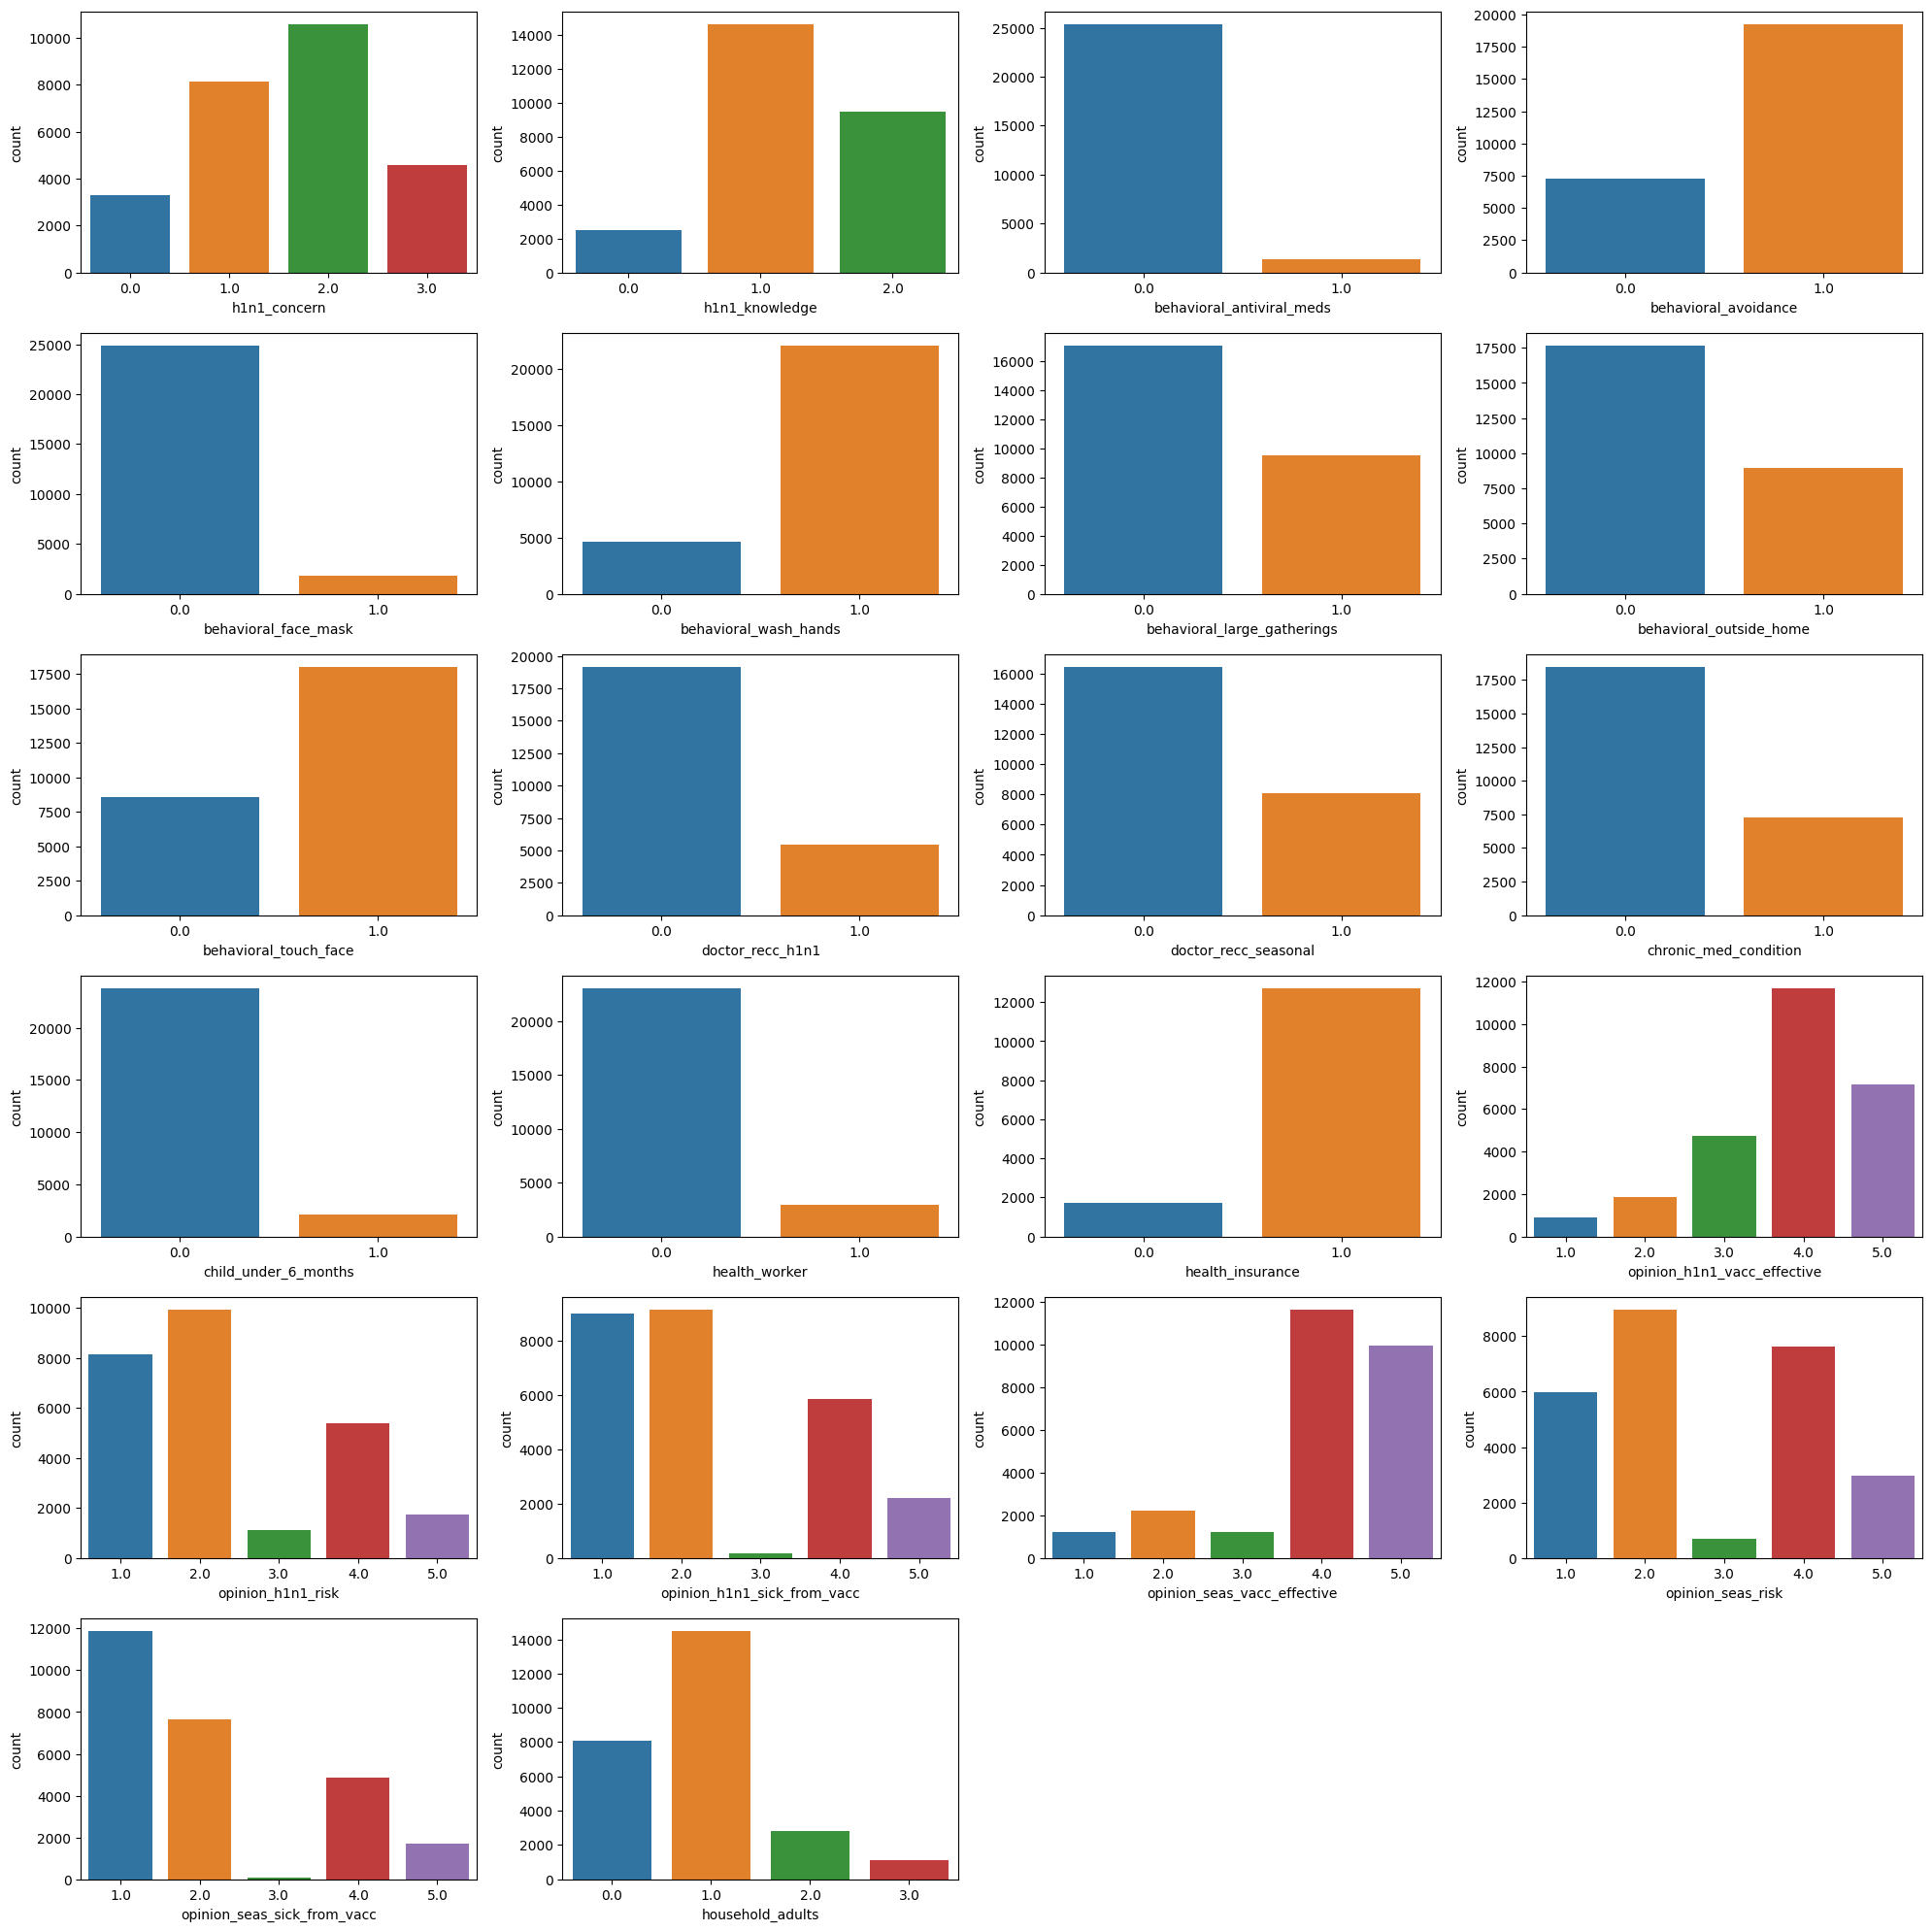

In [14]:
# Numerical columns
plt.figure(figsize=(20,20))
plotnumber=1
for i in num_col:
  if plotnumber<=22:
    ax=plt.subplot(6,4,plotnumber)
    sns.countplot(data=data,x=data[i])
  plotnumber+=1
plt.tight_layout()

**Insights from Univariate analysis of Numerical columns**
* H1N1_concern: Highest number of people are somewhat concerned about H1N1. only few of the people are not at all concerned about H1N1.
* H1n1_knowledge : Most of the respondent having little knowledge about H1N1.
* Behavioral_antiviral_meds: only few respondents has taken antiviral medications.
* Behavioral_avoidance: Most of the respondent has avoided close contact with others.
* Behavioral_face_mask: only few respondent has bought a face mask.
* Behavioral_wash_hands: Most of the respondents are fequently wash their hands.
* Behavioral_large_gatherings: Many people are attending in large gatherings.
* Behavioral_outside_home: Most of the respondent have not reduced the contact with people outside.
* Behavioral_touch_face:Most of the people are avoided touching,eyes,nose,mouth.
* Doctor_recc_h1n1: For many people H1N1 flu vaccine was not recommended by doctor.
* Doctor_recc_seasonal: For many people Seasonal flu vaccine was not recommended by doctor.
* Chronic_med_condition: Only few of the respondent has affected by chronic illness.
* child_under_6_months: Only few of the respondents has regular close contact with a child under the age of six month.
* Health_worker: Only few of the respondents are healthcare workers.
* Health_insurance: Only few of the respondent has not health insurance.
* Opinion_h1n1_vacc_effective: Higher number of respondents say that H1N1 vaccine is somewhat effective.
* Opinion_h1n1_risk: Only few respondent say that they dont know about risk of getting sick with H1N1 flu without vaccine.
* Opinion_h1n1_sick_from_vacc: Most respondents are not worried of getting sick from taking H1N1 vaccine.
* Opinion_seas_vacc_effective: Many people say that seasonal flu vaccine is very effective.
* Opinion_seas_risk: Most people responded that risk of getting sick with seasonal flu without vaccine is low.
* Opinion_seas_sick_from_vacc: Most of the people not worried of getting sick from taking seasonal flu vaccine.
* Household_adults: Large number of people say that other adults in household is one.

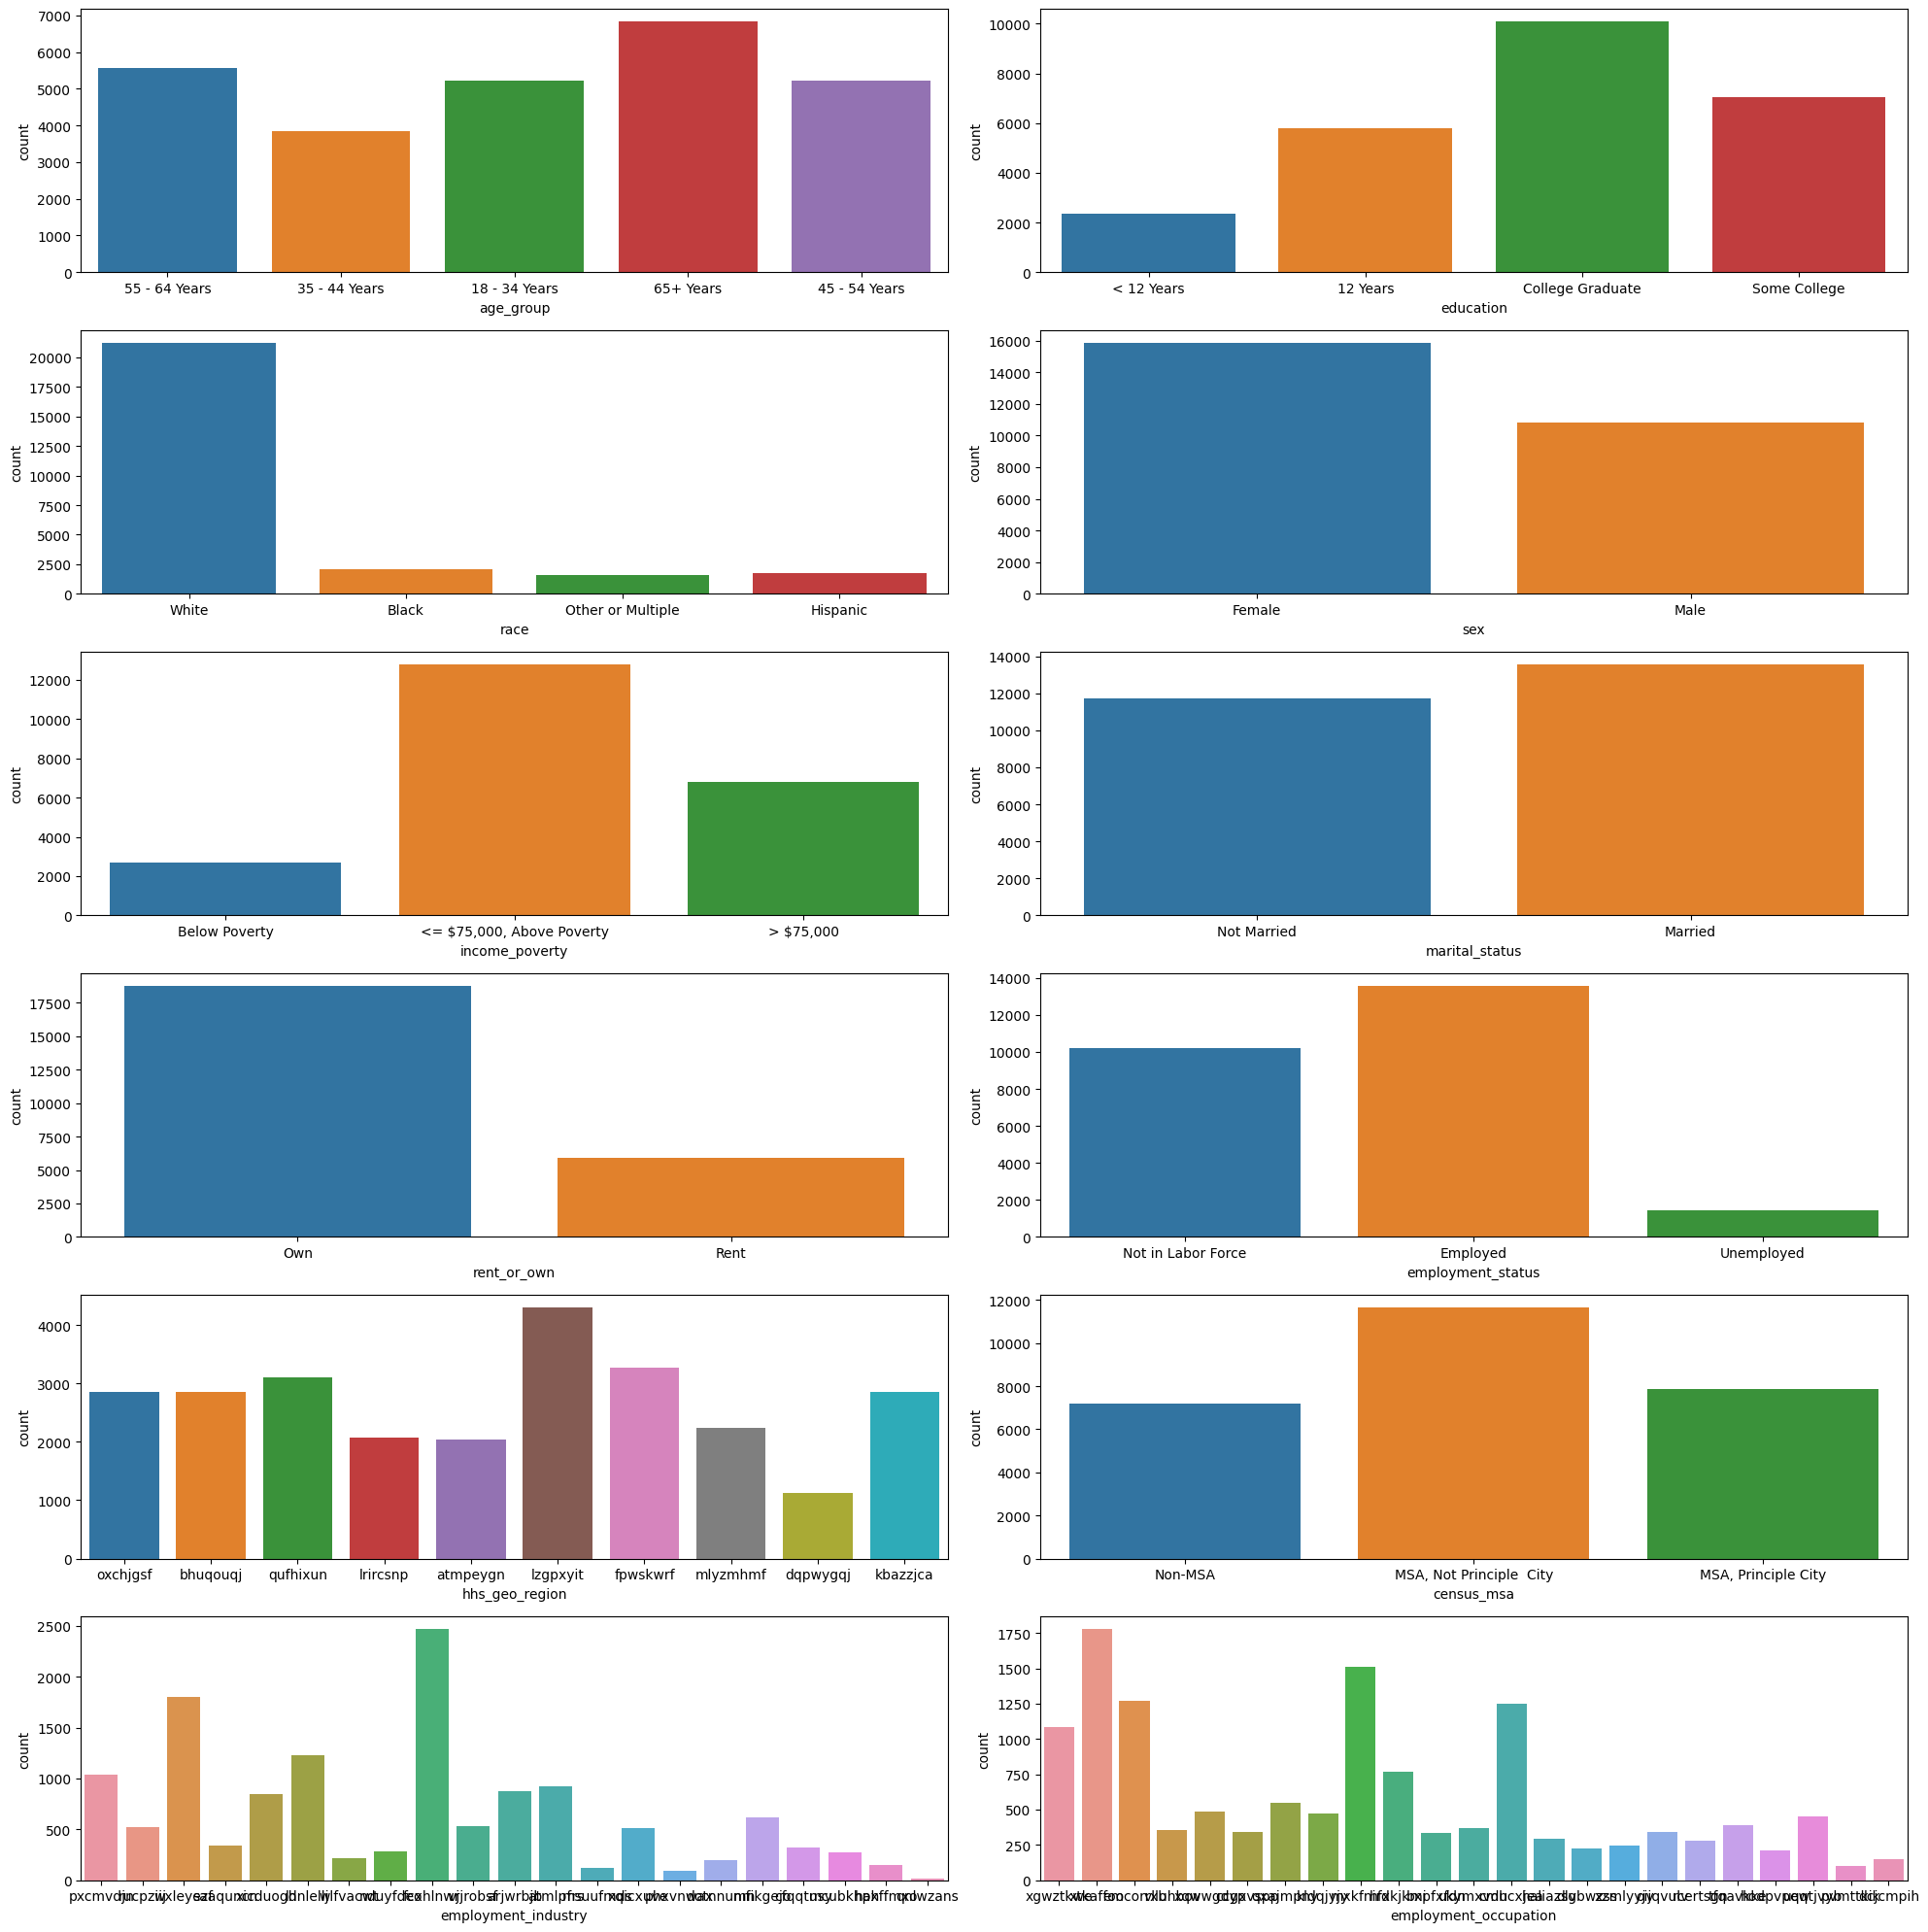

In [15]:
#Categorical columns
plt.figure(figsize=(20,20))
plotnumber=1
for i in cat_col:
  if plotnumber<=12:
    ax=plt.subplot(6,2,plotnumber)
    sns.countplot(data=data,x=data[i])
  plotnumber+=1
plt.tight_layout()

**Insights from Univariate analysis of Categorical columns**
* Age_group: Most of the respondents are from 65 and above age.
* Education: Most of the respondent are college graduate.
* Race: Large number of respondent are from white race.
* Sex: Most of the respondent are female.
* Income_poverty: Large number of respondents are from above poverty.
* Marital_status: Most of the respondent are married.
* Rent or Own: Only few respondent are in rental house.
* Employment status: Only few of the respondent are unemployed.
* Census_msa:  Most of the respondents residence within MSA and Not principle city.

##Bivariate Analysis

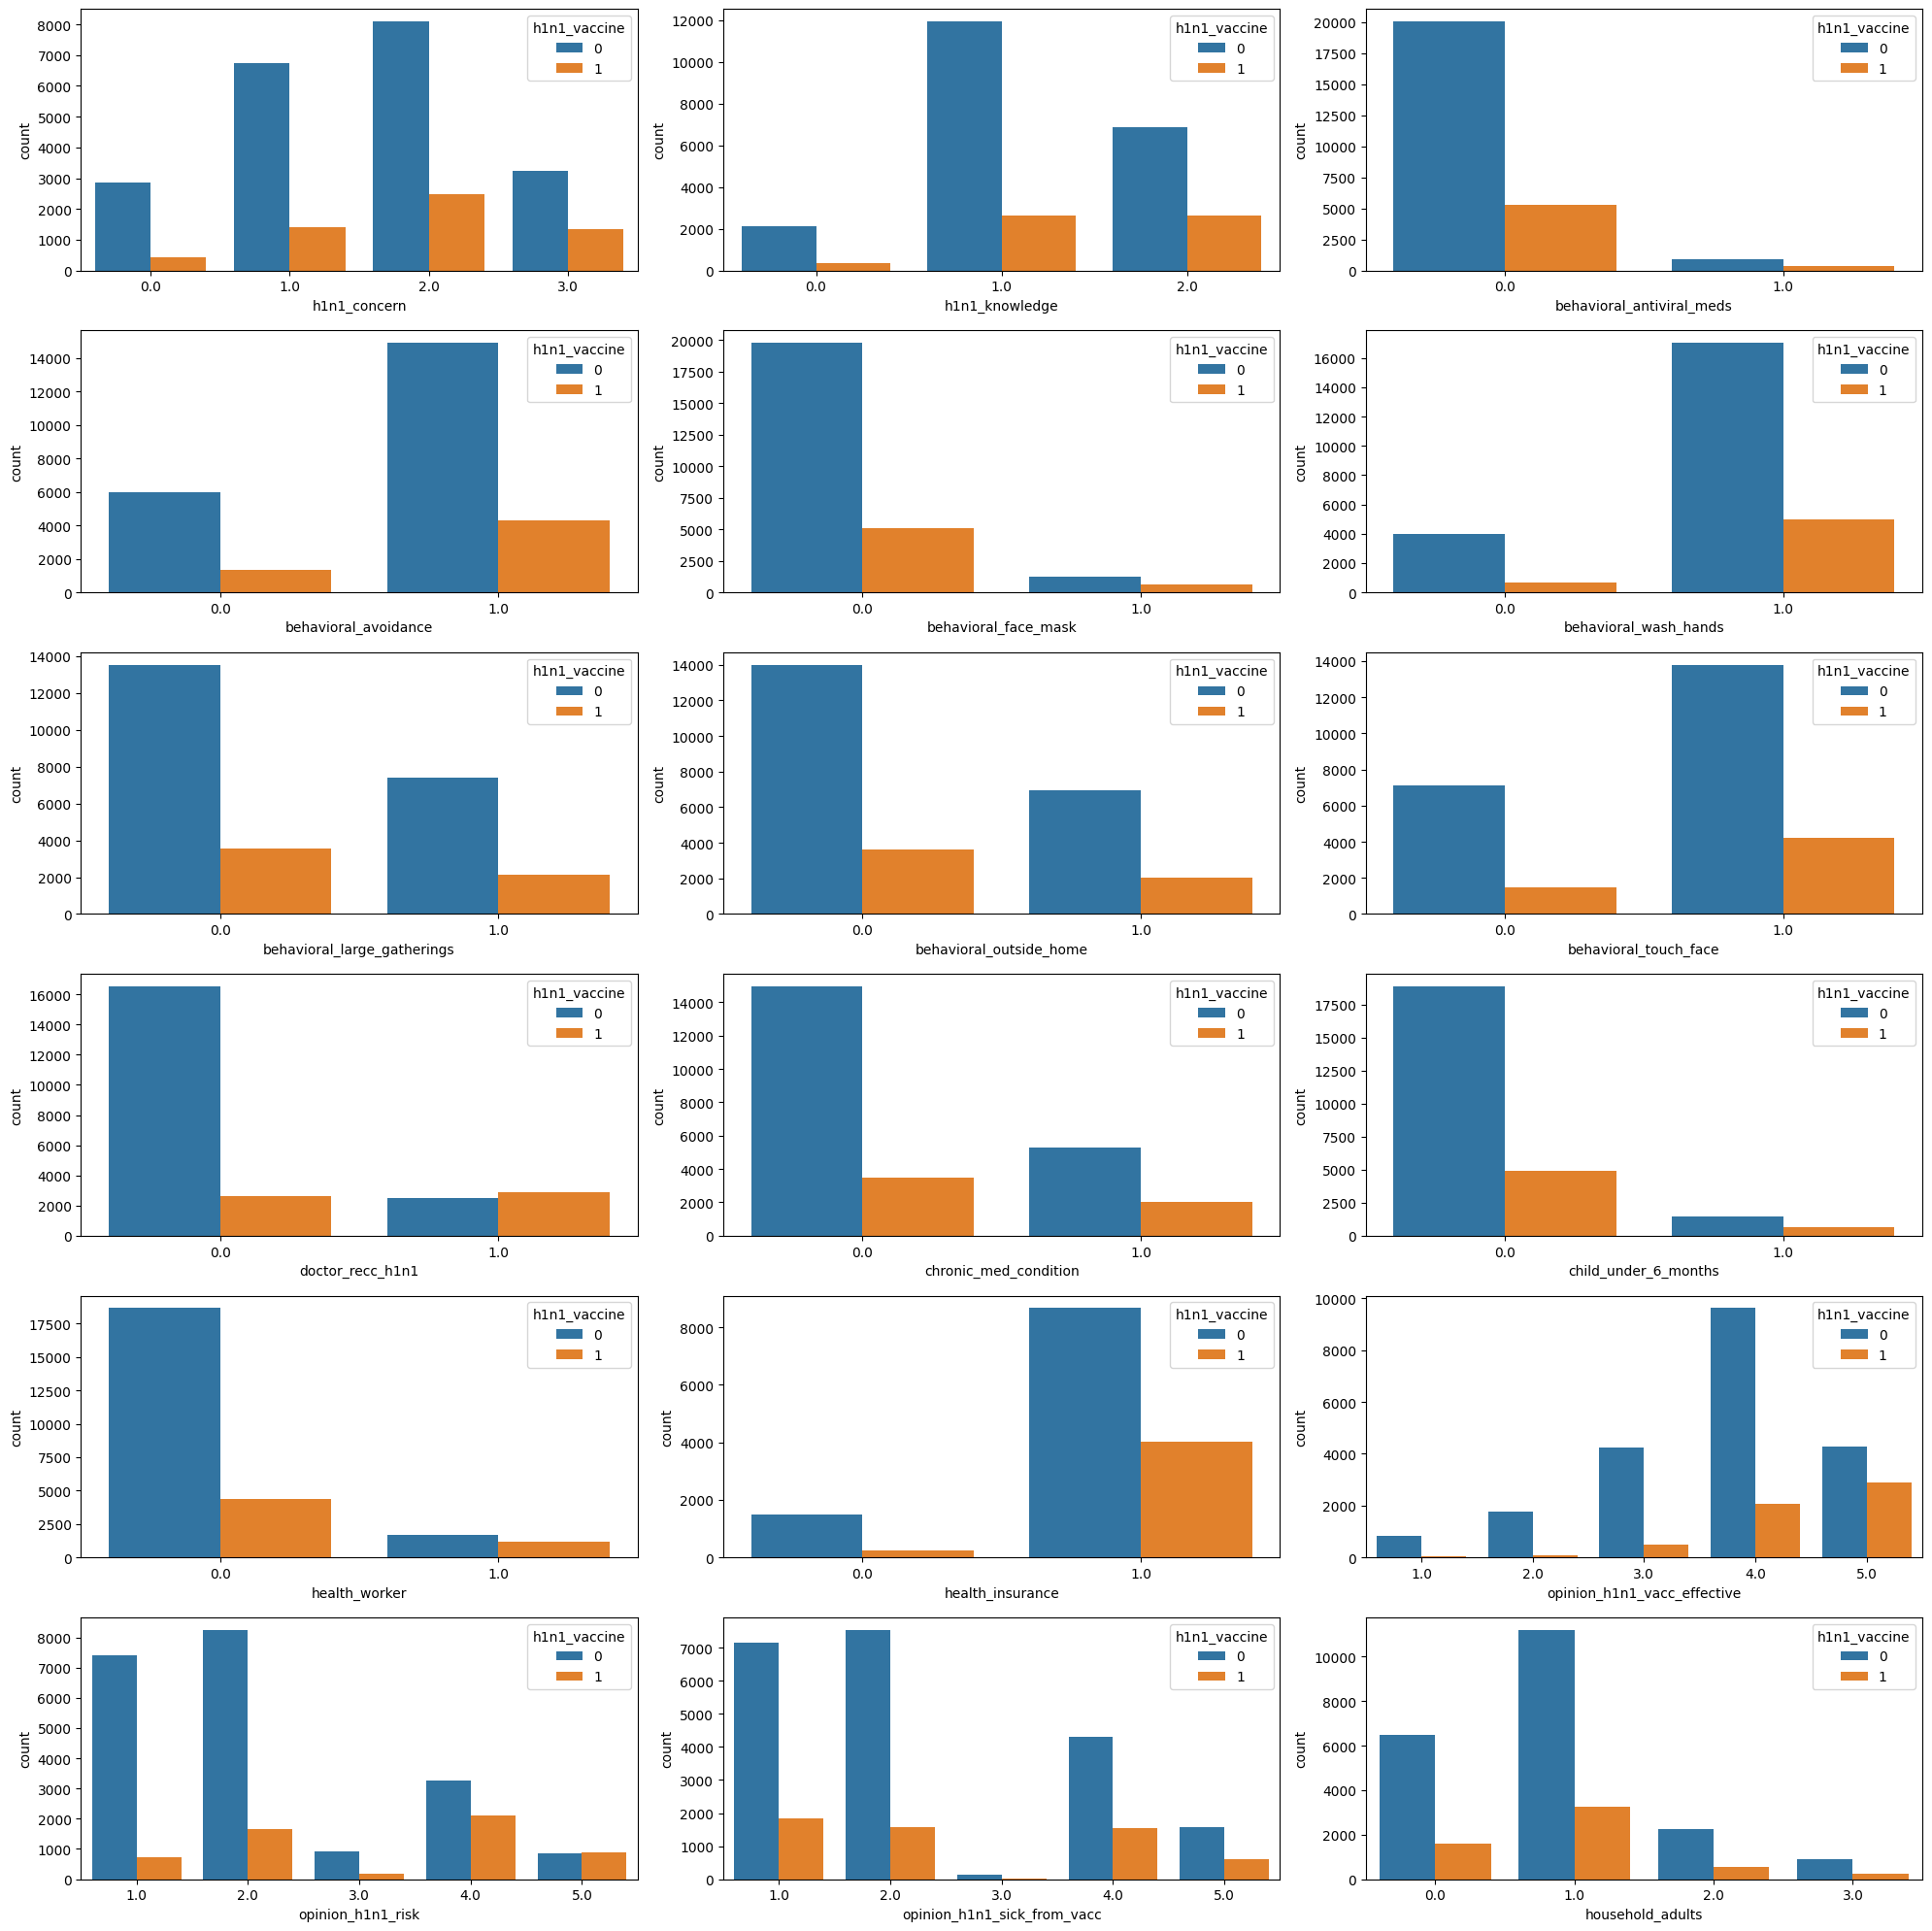

In [16]:
#Numerical column vs H1N1_vaccine
plt.figure(figsize=(20,20))
plotnumber=1
for i in num_col.drop(['doctor_recc_seasonal','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc'],axis=1):
  if plotnumber<=18:
    ax=plt.subplot(6,3,plotnumber)
    sns.countplot(x=data[i],hue=y['h1n1_vaccine'])
  plotnumber+=1
plt.tight_layout()

**Insights from Bivariant analysis of Numerical column vs H1N1 vaccine**
* H1n1_concern: People who are some what concerned about H1N1 flu are highly vaccinated.
* H1n1_knowledge: People who are having knowledge about H1N1 are vaccinated.
* Behavioral_antiviral_meds: Respondent who are taken antiviral medications are not vaccinated
* Behavioral_face_mask: People who doen't bought mask are
vaccinated.
* Behavioral_wash_hands: People using sanitizer and washing hands frequently are highly vaccinated.
* Behavioral_touch_face: People who avoided touching their face are highly vaccinated.
* Doctor_recc_h1n1: Inspite of doctor reccommend h1n1 flu vaccine people are vaccinated.
* Child_under_6_months: People who has close contact with child under age of six month are not vaccinated.
* Health_insurance: people who are having health insurance are highly vaccinated.
* Opinion_h1n1_vacc_effective: Respondent's who says H1N1 vaccine is very effective are highly vaccinated.

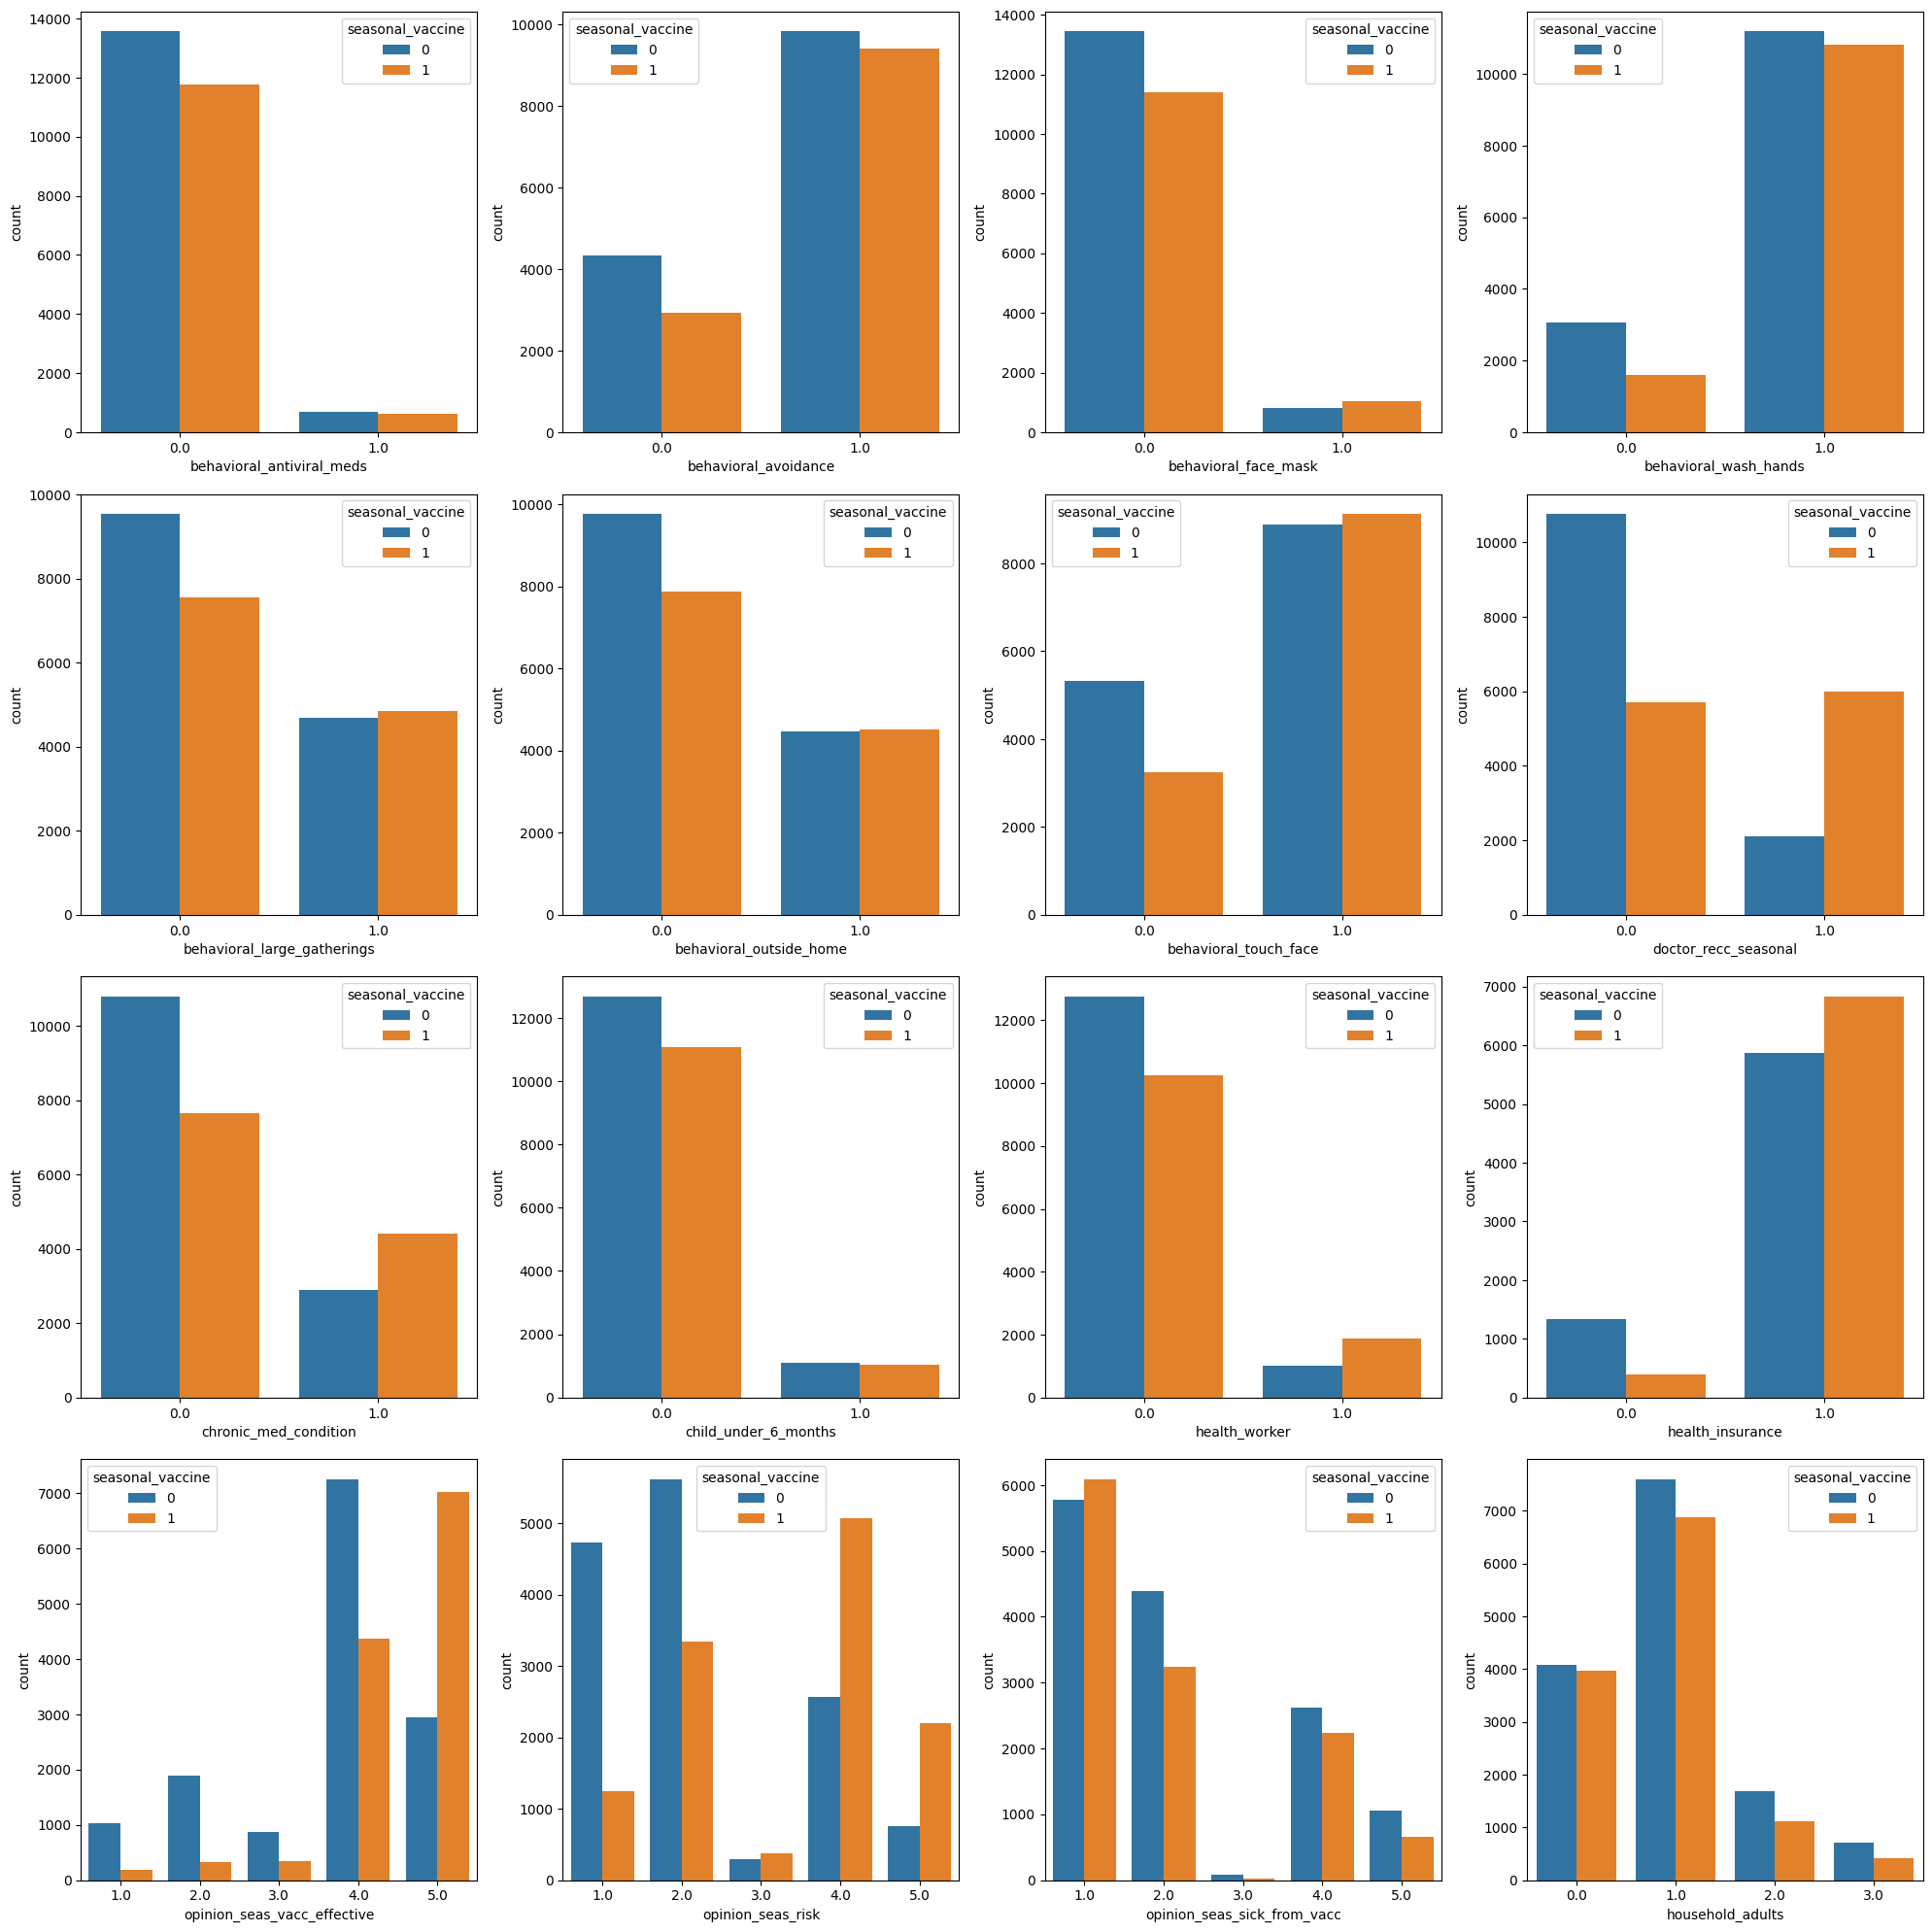

In [17]:
#Numerical column vs seasonal_vaccine
plt.figure(figsize=(20,20))
plotnumber=1
for i in num_col.drop(['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc'],axis=1):
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.countplot(x=data[i],hue=y['seasonal_vaccine'])
  plotnumber+=1
plt.tight_layout()

**Insights from Bivariate analysis of Numerical column vs Seasonal vaccine**
* Behavioral_antiviral_meds: People who has not taken antiviral medications are highly vaccinated.
* Behavioral_face_mask: Respondent who has not bought face mask are highly vaccinated.
* Behavioral_wash_hands: People who are washing their hands frequently and using sanitizer are highly vaccinated.
* Opinion_seas_vacc_effective: People's whose opinion is highly effective on seasonal flu are highly vaccinated.
* Opinion_seas_risk: People who responded very high risk are highly vaccinated.
* Opinion_seas_sick_from_vacc: Respondent's not worried of getting sick from taking seasonal flu vaccine are highly vaccinated.

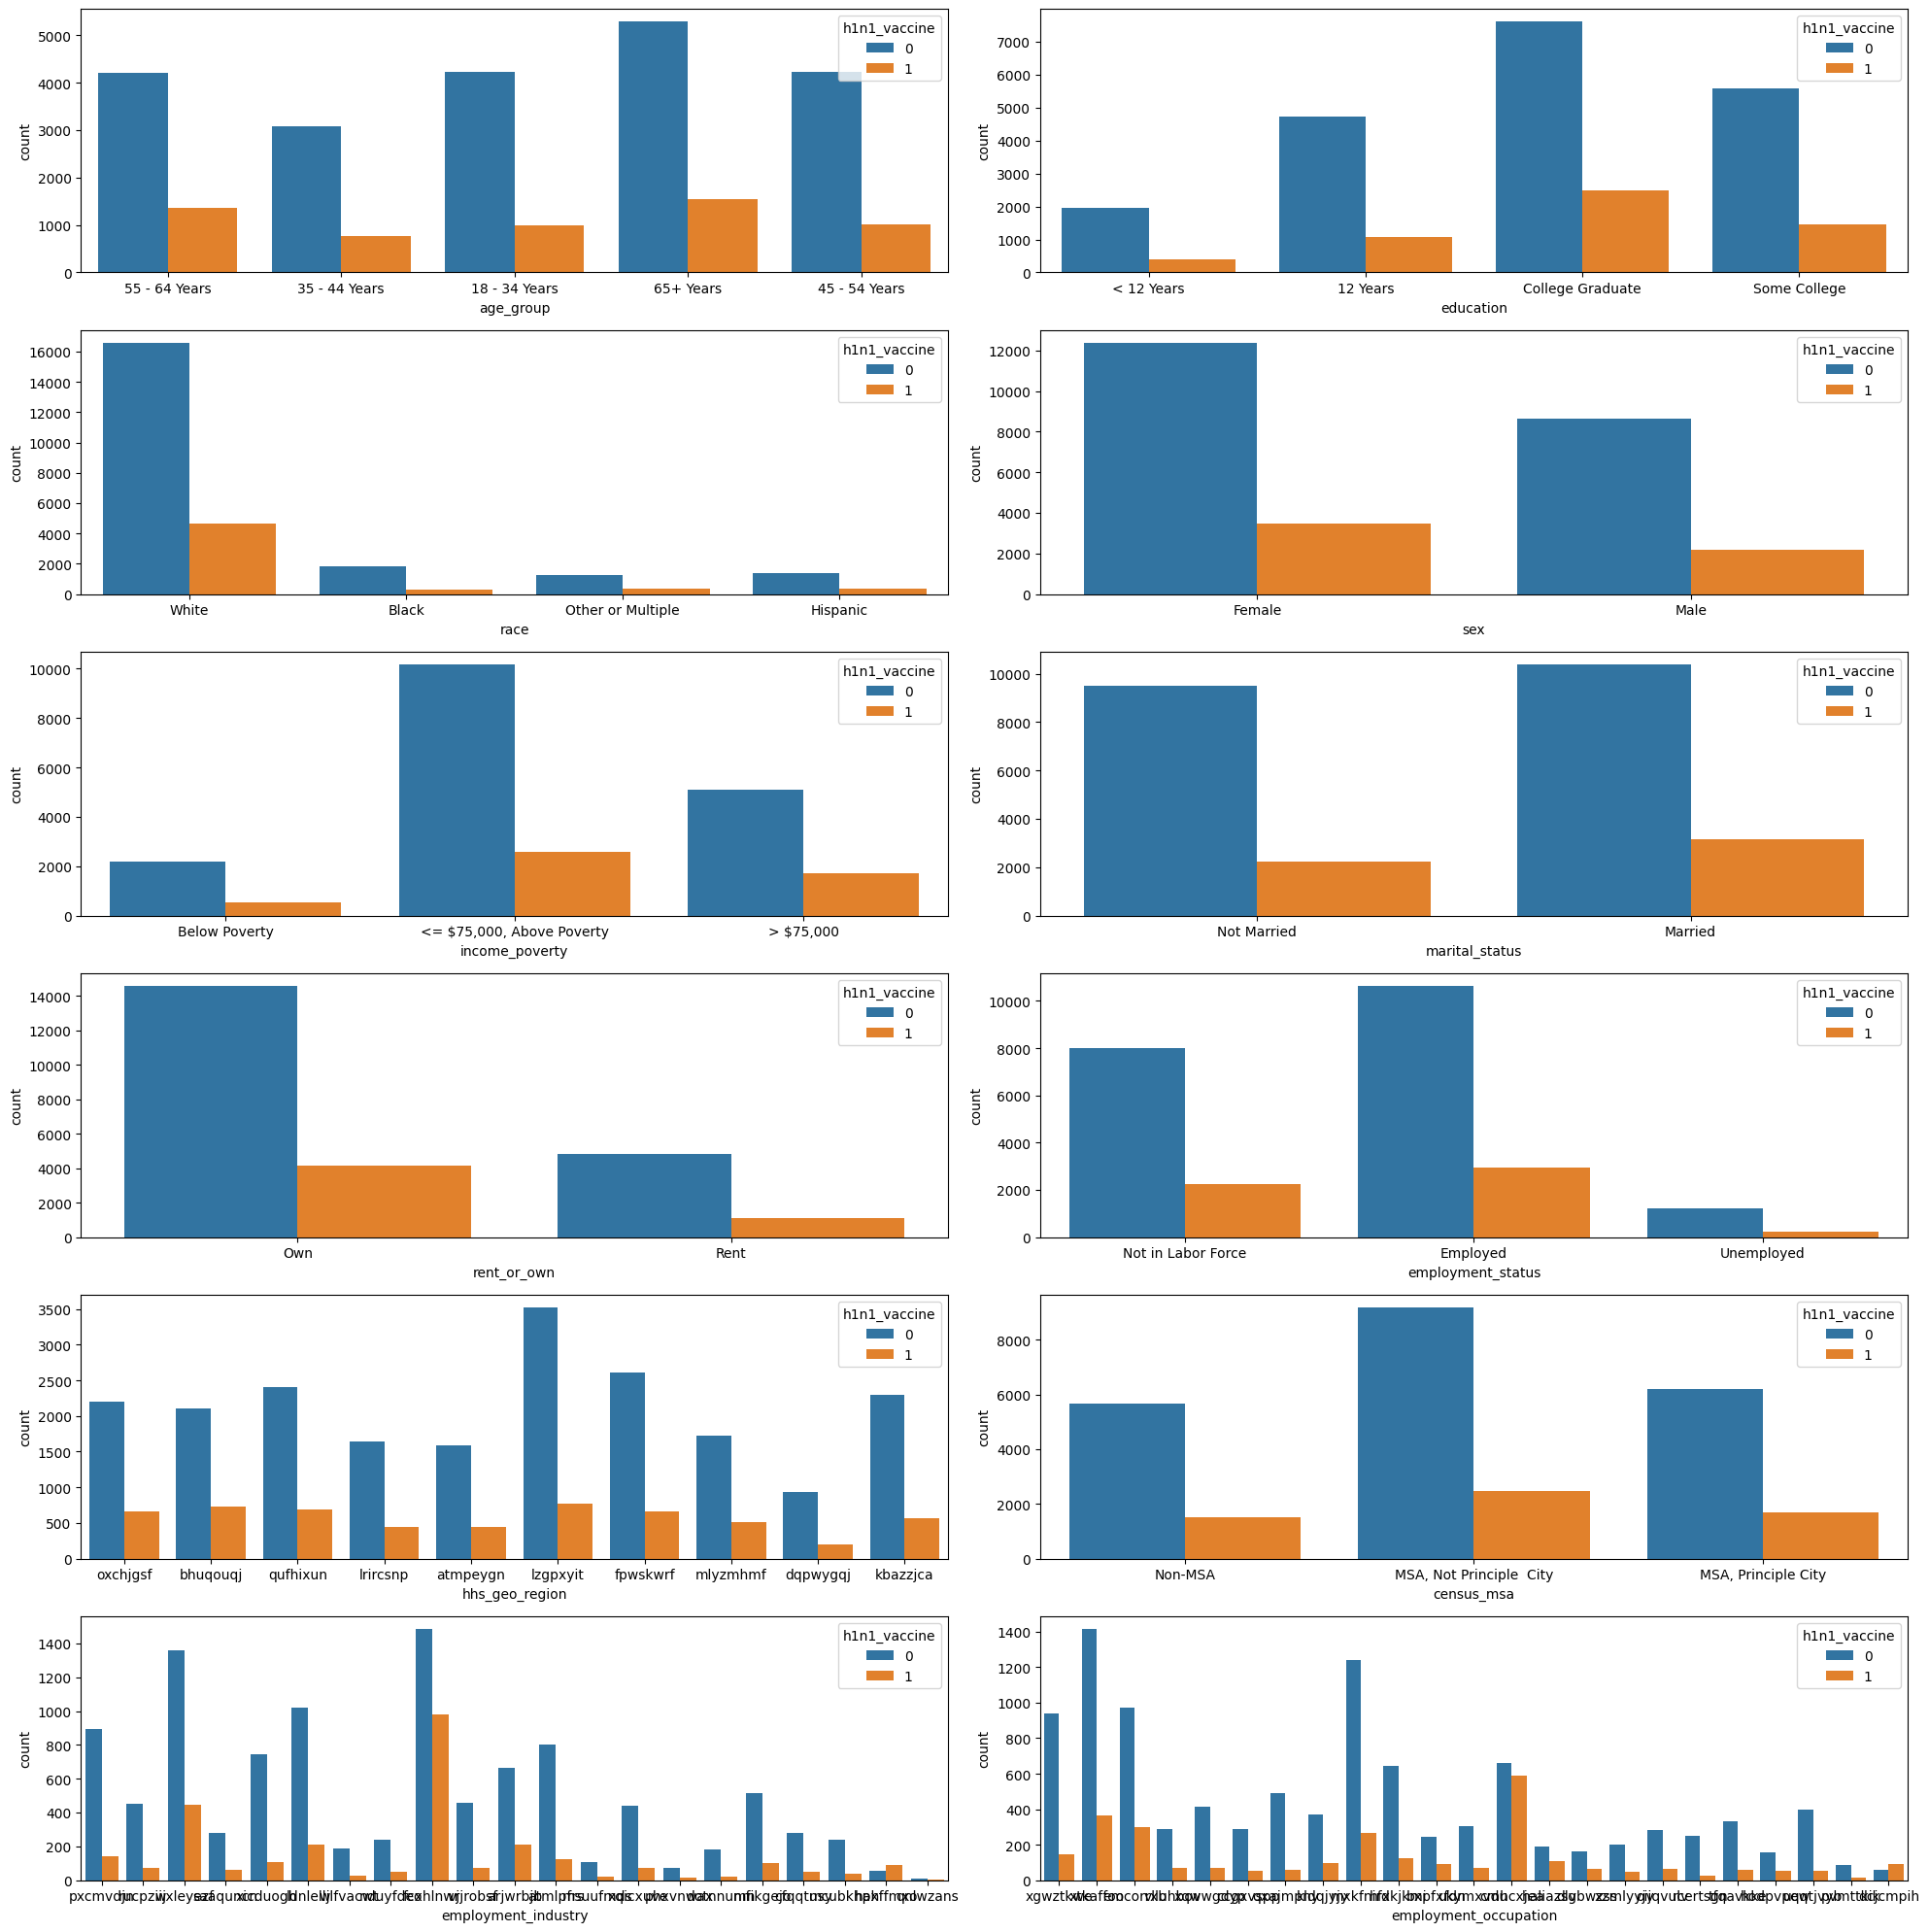

In [18]:
# Categorical column Vs H1N1 vaccine
plt.figure(figsize=(20,20))
plotnumber=1
for i in cat_col:
  if plotnumber<=12:
    ax=plt.subplot(6,2,plotnumber)
    sns.countplot(x=data[i],hue=y['h1n1_vaccine'])
  plotnumber+=1
plt.tight_layout()

**Insights from Bivariant analysis of Categorical column vs H1N1 vaccine**
* Age_group: Respondents whose age is 65 and above are highly vaccinated by H1N1 vaccine.
* Education: People who are college graduate are highly vaccinated by H1n1 vaccine.
* Sex: Female's are taken h1n1 vaccine highly than male's.
* Rent or own: People who are living in own home are taken h1n1 vaccine.
* Employment: Very few unemployed people are taken h1n1 vaccine.


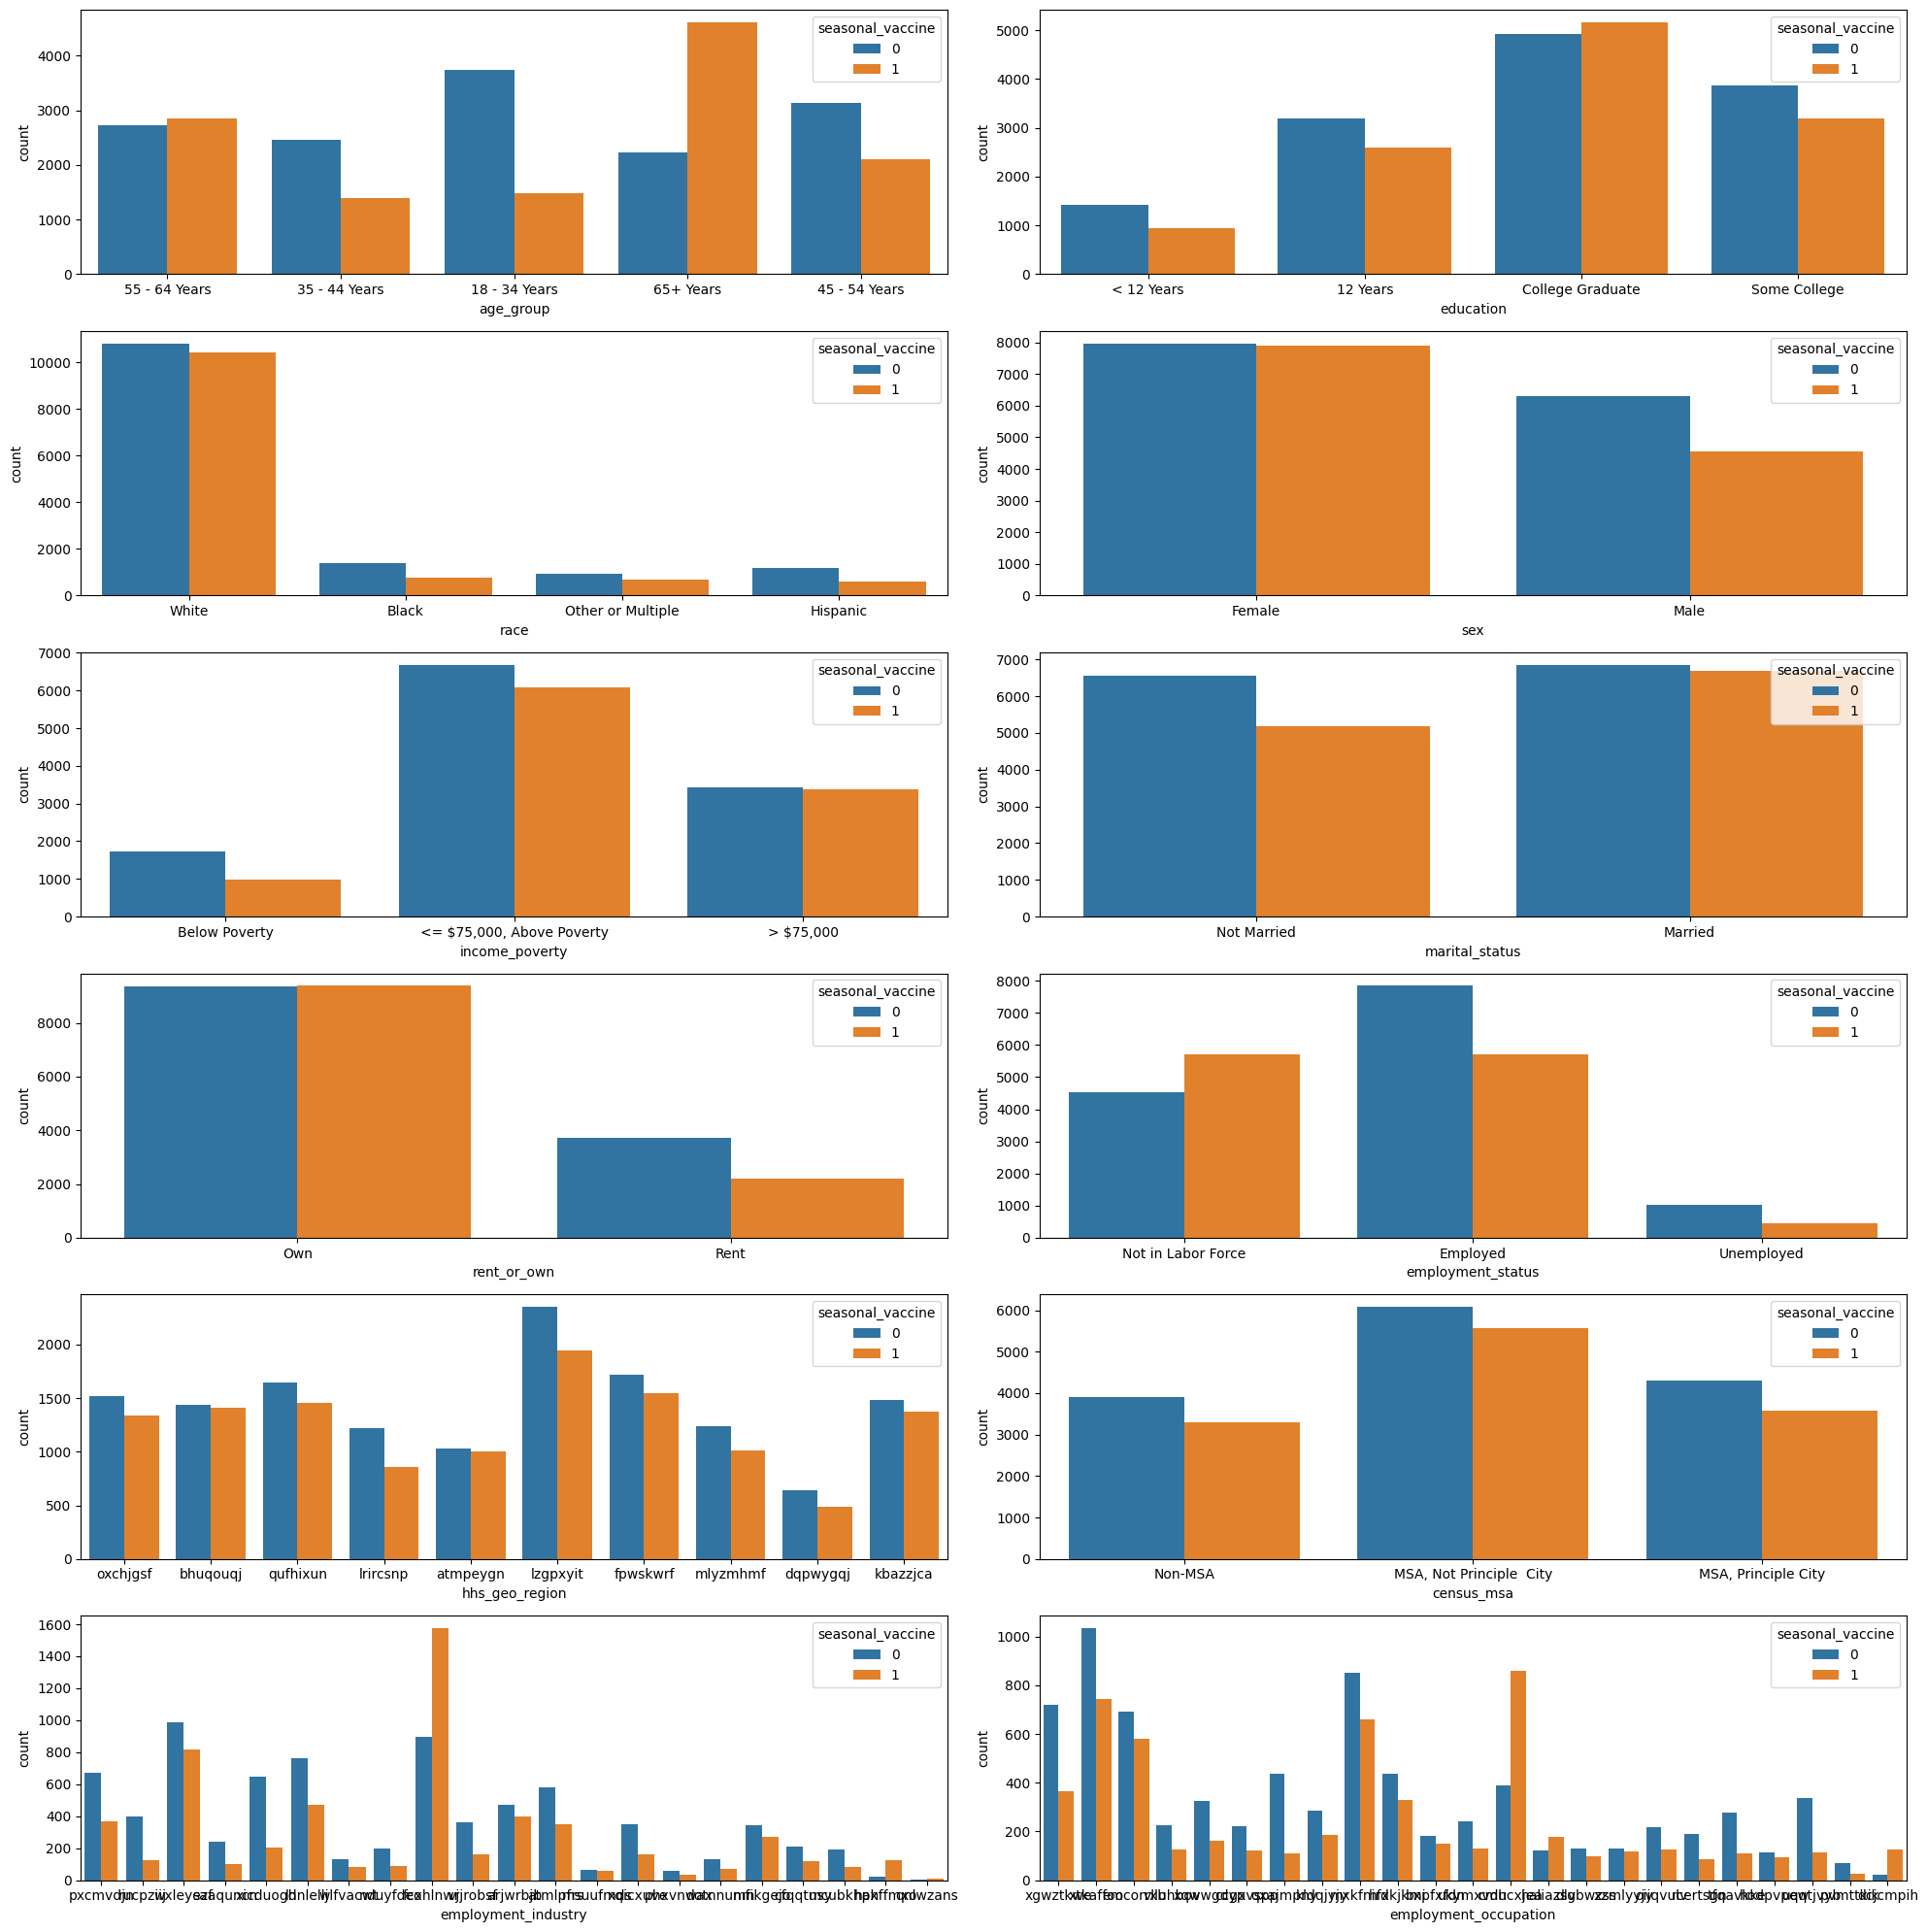

In [19]:
# Categorical column Vs Seasonal vaccine
plt.figure(figsize=(20,20))
plotnumber=1
for i in cat_col:
  if plotnumber<=12:
    ax=plt.subplot(6,2,plotnumber)
    sns.countplot(x=data[i],hue=y['seasonal_vaccine'])
  plotnumber+=1
plt.tight_layout()

**Insights from Bivariant analysis of categorical column vs seasonal vaccine**
* Age_group: Respondents whose age is 65 and above are highly vaccinated by seasonal vaccine.
* Education: People who are college graduate are highly vaccinated by Seasonal vaccine.
* Sex: Female's are taken seasonal vaccine higher than male's.
* Rent or own: People who are living in own home are highly taken seasonal vaccine.
* Employment: Very few unemployed people are taken seasonal vaccine.

**Data Preprocessing**

**Check for missing values**

In [20]:
data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

##Handle the missing values

In [21]:
# h1n1_concern
data['h1n1_concern'].mode()

0    2.0
Name: h1n1_concern, dtype: float64

In [22]:
data.loc[data['h1n1_concern'].isnull()==True,'h1n1_concern']=2.0

In [23]:
# h1n1_knowledge
data['h1n1_knowledge'].mode()

0    1.0
Name: h1n1_knowledge, dtype: float64

In [24]:
data.loc[data['h1n1_knowledge'].isnull()==True,'h1n1_knowledge']=1.0

In [25]:
#behavioral_antiviral_meds
data['behavioral_antiviral_meds'].mode()

0    0.0
Name: behavioral_antiviral_meds, dtype: float64

In [26]:
data.loc[data['behavioral_antiviral_meds'].isnull()==True,'behavioral_antiviral_meds']=0.0

In [27]:
#behavioral_avoidance
data['behavioral_avoidance'].mode()

0    1.0
Name: behavioral_avoidance, dtype: float64

In [28]:
data.loc[data['behavioral_avoidance'].isnull()==True,'behavioral_avoidance']=1.0

In [29]:
# behavioral_face_mask
data['behavioral_face_mask'].mode()

0    0.0
Name: behavioral_face_mask, dtype: float64

In [30]:
data.loc[data['behavioral_face_mask'].isnull()==True,'behavioral_face_mask']=0.0

In [31]:
# behavioral_wash_hands
data['behavioral_wash_hands'].mode()

0    1.0
Name: behavioral_wash_hands, dtype: float64

In [32]:
data.loc[data['behavioral_wash_hands'].isnull()==True,'behavioral_wash_hands']=1.0

In [33]:
# behavioral_large_gatherings
data['behavioral_large_gatherings'].mode()

0    0.0
Name: behavioral_large_gatherings, dtype: float64

In [34]:
data.loc[data['behavioral_large_gatherings'].isnull()==True,'behavioral_large_gatherings']=0.0

In [35]:
# behavioral_outside_home
data['behavioral_outside_home'].mode()

0    0.0
Name: behavioral_outside_home, dtype: float64

In [36]:
data.loc[data['behavioral_outside_home'].isnull()==True,'behavioral_outside_home']=0.0

In [37]:
#behavioral_touch_face
data['behavioral_touch_face'].mode()

0    1.0
Name: behavioral_touch_face, dtype: float64

In [38]:
data.loc[data['behavioral_touch_face'].isnull()==True,'behavioral_touch_face']=1.0

In [39]:
# doctor_recc_h1n1
data['doctor_recc_h1n1'].mode()

0    0.0
Name: doctor_recc_h1n1, dtype: float64

In [40]:
data.loc[data['doctor_recc_h1n1'].isnull()==True,'doctor_recc_h1n1']=0.0

In [41]:
#doctor_recc_seasonal
data['doctor_recc_seasonal'].mode()

0    0.0
Name: doctor_recc_seasonal, dtype: float64

In [42]:
data.loc[data['doctor_recc_seasonal'].isnull()==True,'doctor_recc_seasonal']=0.0

In [43]:
#chronic_med_condition
data['chronic_med_condition'].mode()

0    0.0
Name: chronic_med_condition, dtype: float64

In [44]:
data.loc[data['chronic_med_condition'].isnull()==True,'chronic_med_condition']=0.0

In [45]:
# child_under_6_months
data['child_under_6_months'].mode()

0    0.0
Name: child_under_6_months, dtype: float64

In [46]:
data.loc[data['child_under_6_months'].isnull()==True,'child_under_6_months']=0.0

In [47]:
#health_worker
data['health_worker'].mode()

0    0.0
Name: health_worker, dtype: float64

In [48]:
data.loc[data['health_worker'].isnull()==True,'health_worker']=0.0

In [49]:
#health_insurance
len(data.loc[data['health_insurance'].isnull()==True])/len(data)

0.45957988542329725

In [50]:
data['health_insurance'].mode()

0    1.0
Name: health_insurance, dtype: float64

In [51]:
data.loc[data['health_insurance'].isnull()==True,'health_insurance']=1.0

In [52]:
# opinion_h1n1_vacc_effective
data['opinion_h1n1_vacc_effective'].mode()

0    4.0
Name: opinion_h1n1_vacc_effective, dtype: float64

In [53]:
data.loc[data['opinion_h1n1_vacc_effective'].isnull()==True,'opinion_h1n1_vacc_effective']=4.0

In [54]:
# opinion_h1n1_risk
data['opinion_h1n1_risk'].mode()

0    2.0
Name: opinion_h1n1_risk, dtype: float64

In [55]:
data.loc[data['opinion_h1n1_risk'].isnull()==True,'opinion_h1n1_risk']=2.0

In [56]:
# opinion_h1n1_sick_from_vacc
data['opinion_h1n1_sick_from_vacc'].mode()

0    2.0
Name: opinion_h1n1_sick_from_vacc, dtype: float64

In [57]:
data.loc[data['opinion_h1n1_sick_from_vacc'].isnull()==True,'opinion_h1n1_sick_from_vacc']=2.0

In [58]:
# opinion_seas_vacc_effective
data['opinion_seas_vacc_effective'].mode()

0    4.0
Name: opinion_seas_vacc_effective, dtype: float64

In [59]:
data.loc[data['opinion_seas_vacc_effective'].isnull()==True,'opinion_seas_vacc_effective']=4.0

In [60]:
#opinion_seas_risk
data['opinion_seas_risk'].mode()

0    2.0
Name: opinion_seas_risk, dtype: float64

In [61]:
data.loc[data['opinion_seas_risk'].isnull()==True,'opinion_seas_risk']=2.0

In [62]:
#opinion_seas_sick_from_vacc
data['opinion_seas_sick_from_vacc'].mode()

0    1.0
Name: opinion_seas_sick_from_vacc, dtype: float64

In [63]:
data.loc[data['opinion_seas_sick_from_vacc'].isnull()==True,'opinion_seas_sick_from_vacc']=1.0

In [64]:
#education
data['education'].mode()

0    College Graduate
Name: education, dtype: object

In [65]:
data.loc[data['education'].isnull()==True,'education']='College Graduate'

In [66]:
# income_poverty
data['income_poverty'].mode()

0    <= $75,000, Above Poverty
Name: income_poverty, dtype: object

In [67]:
data.loc[data['income_poverty'].isnull()==True,'income_poverty']='<= $75,000, Above Poverty'

In [68]:
#marital_status
data['marital_status'].mode()

0    Married
Name: marital_status, dtype: object

In [69]:
data.loc[data['marital_status'].isnull()==True,'marital_status']='Married'

In [70]:
# rent_or_own
data['rent_or_own'].mode()

0    Own
Name: rent_or_own, dtype: object

In [71]:
data.loc[data['rent_or_own'].isnull()==True,'rent_or_own']='Own'

In [72]:
#employment_status
data['employment_status'].mode()

0    Employed
Name: employment_status, dtype: object

In [73]:
data.loc[data['employment_status'].isnull()==True,'employment_status']='Employed'

In [74]:
# household_adults
data['household_adults'].mode()

0    1.0
Name: household_adults, dtype: float64

In [75]:
data.loc[data['household_adults'].isnull()==True,'household_adults']=1.0

In [76]:
# household_children
data['household_children'].mode()

0    0.0
Name: household_children, dtype: float64

In [77]:
data.loc[data['household_children'].isnull()==True,'household_children']=0.0

In [78]:
# employment_industry
data['employment_industry'].mode()

0    fcxhlnwr
Name: employment_industry, dtype: object

In [79]:
len(data.loc[data['employment_industry'].isnull()==True])/len(data)

0.4991200808776725

In [80]:
data.loc[data['employment_industry'].isnull()==True,'employment_industry']='fcxhlnwr'

In [81]:
# employment_occupation
data['employment_occupation'].mode()

0    xtkaffoo
Name: employment_occupation, dtype: object

In [82]:
data.loc[data['employment_occupation'].isnull()==True,'employment_occupation']='xtkaffoo'

In [83]:
data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

**Check for Duplicates**

In [84]:
data.duplicated().sum()

0

**Outliers handling and Scaling**\
Since data has no continuous variables outlier handling and scaling is not requires.

**Converting categorical column into numerical**

In [85]:
cat_col.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [86]:
#age_group
print(data['age_group'].unique())
print(data['age_group'].value_counts())

['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64


In [87]:
# Frequency encoding
data['age_group']=data['age_group'].map({'65+ Years':4,'55 - 64 Years':3,'45 - 54 Years':2,'18 - 34 Years':1,'35 - 44 Years':0})

In [88]:
#education
print(data['education'].unique())
print(data['education'].value_counts())

['< 12 Years' '12 Years' 'College Graduate' 'Some College']
College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64


In [89]:
#Frequency encoding
data['education']=data['education'].map({'College Graduate':3,'Some College':2,'12 Years':1,'< 12 Years':0})

In [90]:
#race
print(data['race'].unique())
print(data['race'].value_counts())

['White' 'Black' 'Other or Multiple' 'Hispanic']
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64


In [91]:
#Frequency encoding
data['race']=data['race'].map({'White':3,'Black':2,'Hispanic':1,'Other or Multiple':0})

In [92]:
#sex
print(data['sex'].unique())
print(data['sex'].value_counts())

['Female' 'Male']
Female    15858
Male      10849
Name: sex, dtype: int64


In [93]:
# one hot encoding
data['sex']=pd.get_dummies(data.sex,drop_first=True)

In [94]:
#income_poverty
print(data['income_poverty'].unique())
print(data['income_poverty'].value_counts())

['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64


In [95]:
# one hot encoding
df=pd.get_dummies(data['income_poverty'],prefix='income_poverty',drop_first=True)
data=pd.concat([data,df],axis=1).drop(['income_poverty'],axis=1)


In [96]:
#marital_status
print(data['marital_status'].unique())
print(data['marital_status'].value_counts())

['Not Married' 'Married']
Married        14963
Not Married    11744
Name: marital_status, dtype: int64


In [97]:
#one hot encoding
data['marital_status']=pd.get_dummies(data.marital_status,drop_first=True)

In [98]:
#rent_or_own
print(data['rent_or_own'].unique())
print(data['rent_or_own'].value_counts())

['Own' 'Rent']
Own     20778
Rent     5929
Name: rent_or_own, dtype: int64


In [99]:
#one hot encoding
data['rent_or_own']=pd.get_dummies(data.rent_or_own,drop_first=True)

In [100]:
#employment_status
print(data['employment_status'].unique())
print(data['employment_status'].value_counts())

['Not in Labor Force' 'Employed' 'Unemployed']
Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64


In [101]:
#one hot encoding
df1=pd.get_dummies(data['employment_status'],prefix='employment_status',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['employment_status'],axis=1)


In [102]:
#hhs_geo_region
print(data['hhs_geo_region'].unique())
print(data['hhs_geo_region'].value_counts())

['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64


In [103]:
# Frequency encoding
data['hhs_geo_region']=data['hhs_geo_region'].map({'lzgpxyit':9,'fpwskwrf':8,'qufhixun':7,'oxchjgsf':6,'kbazzjca':5,'bhuqouqj':4,'mlyzmhmf':3,'lrircsnp':2,'atmpeygn':1,'dqpwygqj':0})

In [104]:
#census_msa
print(data['census_msa'].unique())
print(data['census_msa'].value_counts())

['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64


In [105]:
# Frequency encoding
data['census_msa']=data['census_msa'].map({'MSA, Not Principle  City':2,'MSA, Principle City':1,'Non-MSA':0})

In [106]:
# employment_industry
print(data['employment_industry'].unique())
print(data['employment_industry'].value_counts())

['fcxhlnwr' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo' 'cfqqtusy'
 'mcubkhph' 'haxffmxo' 'qnlwzans']
fcxhlnwr    15798
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64


In [107]:
data['employment_industry']=data['employment_industry'].map({'fcxhlnwr':20,'wxleyezf':19,'ldnlellj':18,'pxcmvdjn':17,'atmlpfrs':16,
                                                             'arjwrbjb':15,'xicduogh':14,'mfikgejo':13,'vjjrobsf':12,'rucpziij':11,'xqicxuve':10,'saaquncn':9,
                                                             'cfqqtusy':8,'nduyfdeo':7,'mcubkhph':6,'wlfvacwt':5,'dotnnunm':4,'haxffmxo':3,'msuufmds':2,'phxvnwax':1,'qnlwzans':0})

In [108]:
# employment_occupation
print(data['employment_occupation'].value_counts())

xtkaffoo    15248
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64


In [109]:
data['employment_occupation']=data['employment_occupation'].map({'xtkaffoo':22,'mxkfnird':21,'emcorrxb':20,'cmhcxjea':19,'xgwztkwe':18,'hfxkjkmi':17,'qxajmpny':16,
                                                                 'xqwwgdyp':15,'kldqjyjy':14,'uqqtjvyb':13,'tfqavkke':12,'ukymxvdu':11,'vlluhbov':10,'oijqvulv':9,
                                                                 'ccgxvspp':8,'bxpfxfdn':7,'haliazsg':6,'rcertsgn':5,'xzmlyyjv':4,'dlvbwzss':3,'hodpvpew':2,
                                                                 'dcjcmpih':1,'pvmttkik':0})

In [110]:
data.select_dtypes(include='O').columns

Index([], dtype='object')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   respondent_id                         26707 non-null  int64  
 1   h1n1_concern                          26707 non-null  float64
 2   h1n1_knowledge                        26707 non-null  float64
 3   behavioral_antiviral_meds             26707 non-null  float64
 4   behavioral_avoidance                  26707 non-null  float64
 5   behavioral_face_mask                  26707 non-null  float64
 6   behavioral_wash_hands                 26707 non-null  float64
 7   behavioral_large_gatherings           26707 non-null  float64
 8   behavioral_outside_home               26707 non-null  float64
 9   behavioral_touch_face                 26707 non-null  float64
 10  doctor_recc_h1n1                      26707 non-null  float64
 11  doctor_recc_sea

**Converting float datatype into integer**

In [112]:
data[['h1n1_concern','h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children']]=data[['h1n1_concern','h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children']].astype('int64')


In [113]:
data.dtypes

respondent_id                           int64
h1n1_concern                            int64
h1n1_knowledge                          int64
behavioral_antiviral_meds               int64
behavioral_avoidance                    int64
behavioral_face_mask                    int64
behavioral_wash_hands                   int64
behavioral_large_gatherings             int64
behavioral_outside_home                 int64
behavioral_touch_face                   int64
doctor_recc_h1n1                        int64
doctor_recc_seasonal                    int64
chronic_med_condition                   int64
child_under_6_months                    int64
health_worker                           int64
health_insurance                        int64
opinion_h1n1_vacc_effective             int64
opinion_h1n1_risk                       int64
opinion_h1n1_sick_from_vacc             int64
opinion_seas_vacc_effective             int64
opinion_seas_risk                       int64
opinion_seas_sick_from_vacc       

**Feature Engineering**

<Axes: >

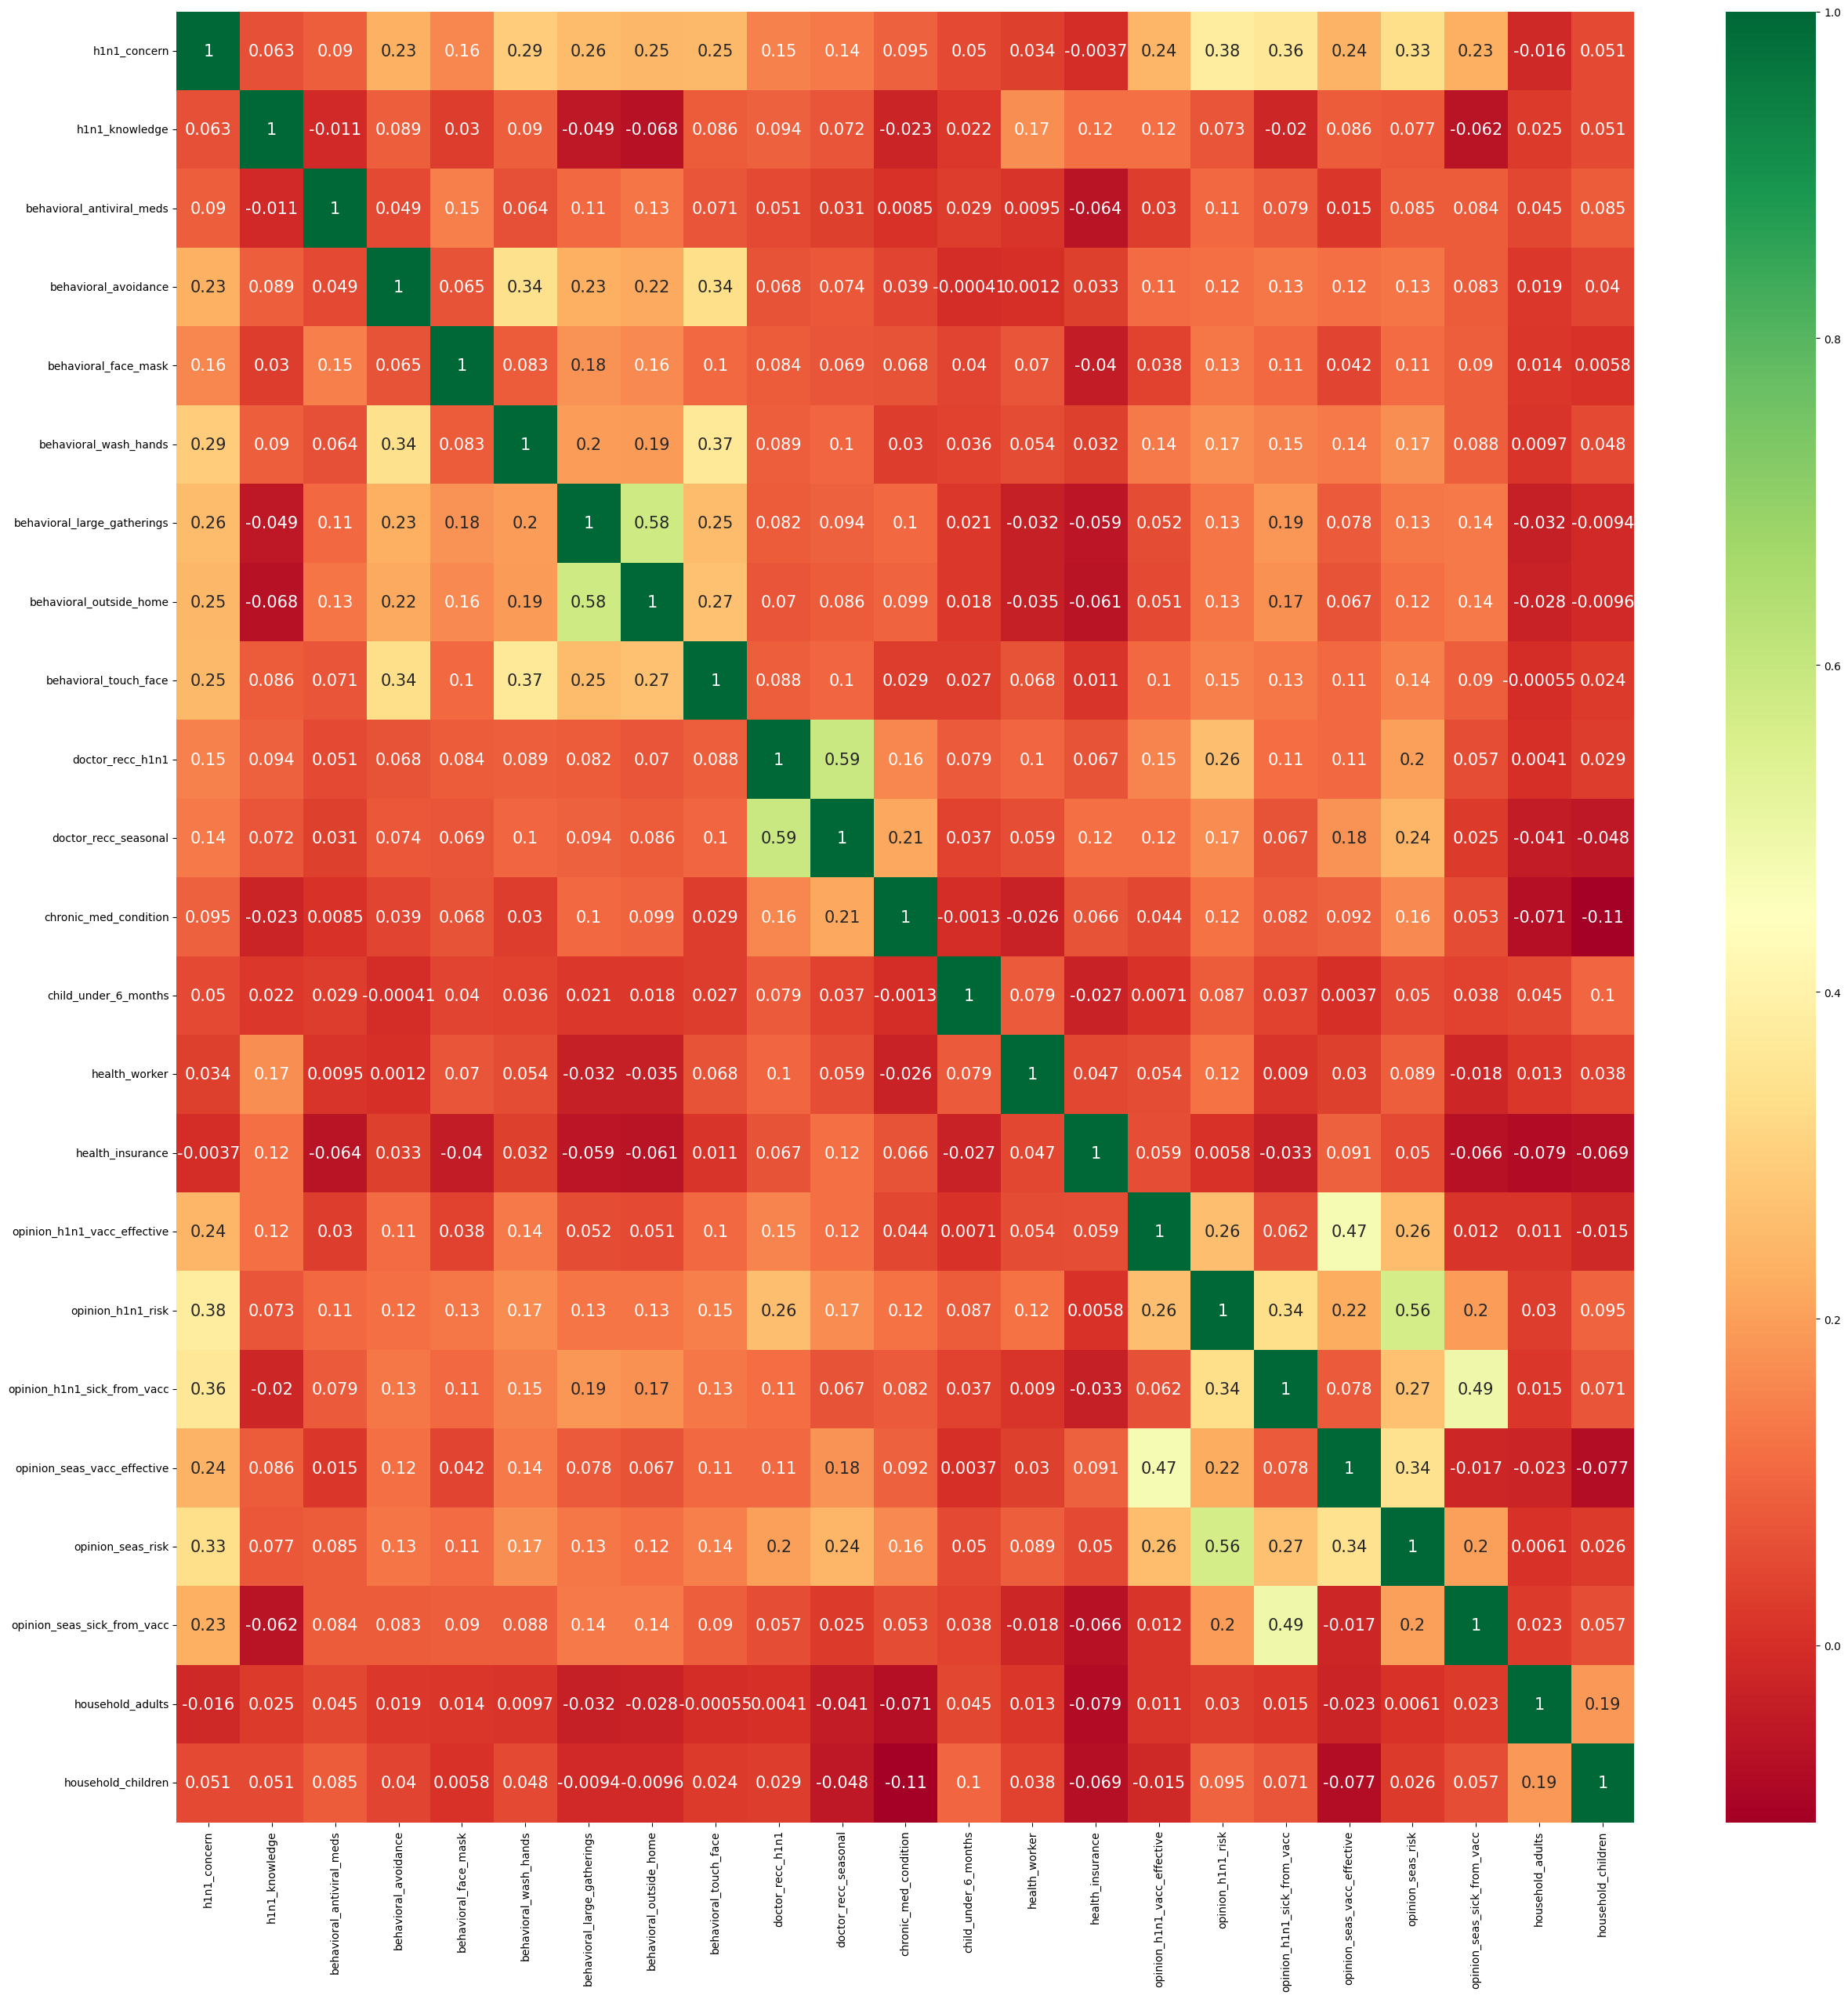

In [114]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(num_col.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

**Therefore,correlation between the input features are less.**

In [115]:
# Removing respondent_id column from data and y
data.drop('respondent_id',axis=1,inplace=True)
y.drop('respondent_id',axis=1,inplace=True)

**Splitting the data for training and testing**

In [116]:
# splitting data for training and testing
x=data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [117]:
x_train.shape

(18694, 37)

In [118]:
y_train.shape

(18694, 2)

**Model Creation**
## Artificial Neural Network

In [119]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(200,6),
                       learning_rate_init=0.001,
                       max_iter=300,
                       random_state=50)
model.fit(x_train,y_train) ## training the data
y_predict = model.predict(x_test)

**Evaluating the model**

In [120]:
from sklearn.metrics import f1_score,accuracy_score,multilabel_confusion_matrix
a_ann=accuracy_score(y_test,y_predict)
print(a_ann)

0.6153750155996506


In [121]:
print(multilabel_confusion_matrix(y_test,y_predict))

[[[5876  441]
  [1059  637]]

 [[3203 1077]
  [1065 2668]]]


##Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)

# Evaluation

In [123]:
accuracy_score(y_test,y_pred)

0.6576812679395981

In [124]:
multilabel_confusion_matrix(y_test,y_pred)

array([[[6028,  289],
        [1065,  631]],

       [[3383,  897],
        [ 946, 2787]]])

In [125]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RFC,x,y,cv=3,scoring='accuracy')
print(scores)
print("Cross validation Score:",scores.mean())
a_RFC=scores.mean()
print(a_RFC)
print("Std :",scores.std())
#std of < 0.05 is good.

[0.66090082 0.66771512 0.66872613]
Cross validation Score: 0.6657806897019416
0.6657806897019416
Std : 0.0034751864495202304


Therefore the std is less than 0.05, we conclude the model is good.

## Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier

# Create the base classifier
base_classifier = GradientBoostingClassifier(n_estimators=500)

# Create a MultiOutputClassifier wrapper
multi_output_gb = MultiOutputClassifier(base_classifier)

# Fit the model
multi_output_gb.fit(x_train, y_train)

# Make predictions
y_pred_GB = multi_output_gb.predict(x_test)

##Evaluation

In [127]:
accuracy_score(y_test,y_pred_GB)

0.6725321352801698

In [128]:
multilabel_confusion_matrix(y_test,y_pred_GB)

array([[[5951,  366],
        [ 940,  756]],

       [[3457,  823],
        [ 931, 2802]]])

In [129]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(multi_output_gb,x,y,cv=5,scoring='accuracy')
print(scores)
print("Cross validation Score:",scores.mean())
a_GB=scores.mean()
print("Std :",scores.std())
#std of < 0.05 is good.

[0.67446649 0.67240734 0.67571616 0.68919678 0.67403108]
Cross validation Score: 0.677163569600074
Std : 0.006109035916075735


Therefore the std is less than 0.05, we conclude the model is good.

In [130]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00


**Binary Relevance**

In [131]:
# Libraries for Problem Transformation
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression

##Using Binary Relevance - Logistic Regression

In [132]:
BR_LR = BinaryRelevance(LogisticRegression())

# Training

BR_LR.fit(x_train,y_train)

# Prediction

y_pred= BR_LR.predict(x_test)

In [133]:
# Evaluating the accuracy
a_BR_LR=accuracy_score(y_test,y_pred)
print(a_BR_LR)

0.6520653937351804


## Using Binary Relevance - Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
BR_DT = BinaryRelevance(DecisionTreeClassifier())

# Training
BR_DT.fit(x_train,y_train)

# Prediction

y_pred = BR_DT.predict(x_test)

In [135]:
# Evaluating the accuracy
a_BR_DT=accuracy_score(y_test,y_pred)
print(a_BR_DT)

0.5232746786471983


**Classifier Chain**

In [136]:
from skmultilearn.problem_transform import ClassifierChain

## Using Classifierchain - Logistic Regression

In [137]:
CC_LR = ClassifierChain(LogisticRegression())

# Training

CC_LR.fit(x_train,y_train)

# Prediction

y_pred =CC_LR.predict(x_test)

In [138]:
# Evaluation
a_CC_LR=accuracy_score(y_test,y_pred)
print(a_CC_LR)

0.6561837014850868


##Using ClassifierChain - Decision Tree

In [139]:
CC_DT = ClassifierChain(DecisionTreeClassifier())

# Training

CC_DT.fit(x_train,y_train)

# Prediction

y_pred =CC_DT.predict(x_test)

In [140]:
# Evaluation
a_CC_DT=accuracy_score(y_test,y_pred)
print(a_CC_DT)

0.5337576438287782


**Recommendation**

In [141]:
Accuracy=(a_ann,a_RFC,a_GB,a_BR_LR,a_BR_DT,a_CC_LR,a_CC_DT)
Accuracy_table=pd.DataFrame(Accuracy,columns=['Accuracy_score'],index=['Artificial Neural Network','Random Forest Classifier','Gradient Boosting','Binary Relevance - Logistic Regression','Binary Relevance - Decision Tree',
'Classifier-Chain - Logistic Regression','Classifier-Chain - Decision Tree'])

In [142]:
Accuracy_table

,Accuracy_score
Artificial Neural Network,0.615375
Random Forest Classifier,0.665781
Gradient Boosting,0.677164
Binary Relevance - Logistic Regression,0.652065
Binary Relevance - Decision Tree,0.523275
Classifier-Chain - Logistic Regression,0.656184
Classifier-Chain - Decision Tree,0.533758


#### **Conclusion**

**By comparing above models Gradient Boosting has given highest accuracy. Suggesting Gradient Boosting classifier for production**

**Report on Challenges Faced**
* For Features "employment_industry" and "employment_occupation", values are represented as short random character (strings) in the dataset. It is difficult to analyse the data, we got confused whether it will impact the labels, so we have choosen frequency encoding for conversion of these features.
* Since it is Multilabel Classification, it requires additional technique to apply for the models which we practised in the class. The Problem transformation techniques we used includes "Binary relevance" and "classifier-chain" models.
* We could not apply Hyperparameter tuning, GridSearchCV and RandomizedsearchCV techniques for this data, since data was large. It takes more than hour to execute.
* On applying multiple models, got maximum accuracy 67% (for Gradient Boosting). Eventhough we tried with further changes to the model with parameters like estimators, learning rate, random_state etc., accuracy was not increasing.
